# Project: Corona Sprint 5 in Machine Learning
## team member: Xiaofeng(Robbie), Robin, Ahmad, Riyao(Peter)
## date: 12/06/2022

## TASK LIST
    TASK1 - Integrate New Variables (9 USA Macro Economic Variables)
    TASK2 - Select the best 40 Variables (including the one that you got)
    TASK3 - Preliminary Model for new Variables (Sprint 2)
    TASK4 - Add more variables into the models (Sprint 3)
    TASK5 - Trying Trees model (Sprint 3)
    TASK6 - Build for loops and functions to automative the modeling and testing (Sprint 4)
    TASK7 - Include lag_variables to consideration (Sprint 4)
    TASK8 - Try new models (non linear regression) (Sprint 5)
    TASK9 - Renew the TOP list (Sprint 5)

# <font color = 'blue'><b>Libraries

In [1]:
import os
import gc
import datetime

import pandas as pd
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

import numpy as np

from string import ascii_letters

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import plotly
import plotly.express as px
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split #Split data in testing and training
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import normalize


from functools import reduce

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

import calendar as cl
from calendar import monthrange

from tqdm import tqdm

from xgboost import XGBRegressor

from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor

print('Packages importing successfully.')

Packages importing successfully.


In [2]:
# load the py file with functions we created
import Created_Functions
from Created_Functions import Created_Functions

In [3]:
# get the dataframe's name
def get_df_name(data):
    name =[x for x in globals() if globals()[x] is data][0]
    return name

# <font color = 'blue'>New variables importing

In [4]:
# variables by Robbie
new_variables_Robbie = pd.read_csv('US Marco data Robbie.csv')
# convert the Date to INDEX
new_variables_Robbie.index = pd.to_datetime(new_variables_Robbie['observation_date'])
new_variables_Robbie.drop("observation_date", axis = 1, inplace = True)
new_variables_Robbie = new_variables_Robbie.rename(columns = {"FEDFUNDS": "US Federal Funds Effective Rate", 
                                  "CPALTT01USM657N": "US Consumer Price Index", 
                                 "PCE": "US Personal Consumption Expenditures"})
new_variables_Robbie = new_variables_Robbie.dropna()
#new_variables_Robbie.head()

In [5]:
# variables by Ahmad
new_variables_AB = pd.read_csv('new_variables_Ahmad.csv')
# convert the Date to INDEX
new_variables_AB.index = pd.to_datetime(new_variables_AB['observation_date'])
new_variables_AB.drop("observation_date", axis = 1, inplace = True)
new_variables_AB = new_variables_AB.dropna()
#new_variables_AB.head()

In [6]:
# variables by Peter
new_variables_Peter = pd.read_csv('US Marco data Peter.csv')
# convert the Date to INDEX
new_variables_Peter.index = pd.to_datetime(new_variables_Peter['DATE'])
new_variables_Peter.drop("DATE", axis = 1, inplace = True)
#new_variables_Peter.head()

In [7]:
# variables by Robin
new_variables_Robin = pd.read_csv('US Marco data Robin.csv')
# convert the Date to INDEX
new_variables_Robin.index = pd.to_datetime(new_variables_Robin['date'])
new_variables_Robin.drop("date", axis = 1, inplace = True)
#new_variables_Robin.head()

In [8]:
# combine new variables
combined_var = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='left'),
                 [new_variables_Robbie, new_variables_AB, new_variables_Peter, new_variables_Robin])
combined_var = combined_var.drop(columns=['U.S Rental Vacency Rate','PrivateWages',  'US Federal Funds Effective Rate', 'Retail Sales (% Change)'])
combined_var = combined_var.rename(columns = {"US Consumer Price Index": "US CPI", 
                                  "US Personal Consumption Expenditures": "US PCE", "Unemployment Rate": "U Rate",
                                 "Real GDP Per Capita": "RGDP/Cap", "Average Price Fuel Oil": "AOP", 'Import & Export': 'IMEX', 'AvgWeeklyHourslag_3': 'AvgWkHrslag_3' })
combined_var = combined_var.dropna()
combined_var.head()

US CPI   US PCE  U Rate  RGDP/Cap      TCU    AOP  \
observation_date                                                        
2017-01-01        0.582773  13020.4     4.7   54866.0  75.2623  2.482   
2017-02-01        0.314612  13038.6     4.6   54866.0  75.0381  2.474   
2017-03-01        0.081280  13089.3     4.4   54866.0  75.5665  2.449   
2017-04-01        0.296553  13114.1     4.4   55057.0  76.3559  2.438   
2017-05-01        0.085472  13117.6     4.4   55057.0  76.4721  2.378   

                  AvgWeeklyHours  Import_Export  
observation_date                                 
2017-01-01                  34.4          121.6  
2017-02-01                  34.3          122.0  
2017-03-01                  34.3          122.1  
2017-04-01                  34.4          122.4  
2017-05-01                  34.4          121.7

### New variables Summary 
#### new macro economy variables list: 
    Robbie: 1.US Federal Funds Effective Rate, 2.US Consumer Price Index, 3.US Personal Consumption Expenditures
    Ahmad: 4.Unemployment Rate, 5.Retail Sales (% Change), 6.Real GDP Per Capita
    Peter: 7.Capacity Utilization:Total Index(TCU), 8.US Average Price:Fuel Oil per Gallon(APU), 9.US Rental Vacancy Rate
    Robin: 10.US Average weekly working hour, 11.US import/export price indexes, 12.US Private wages and salary
#### sum up the significant variables from all members, we get some best lists here:
               name                              /    correlation 
    1. US Personal Consumption Expenditures      /    0.620402
    2. US Consumer Price Index                   /    0.471517
    3. Unemployment Rate                         /   -0.415215
    4. Real GDP Per Capita                       /    0.700972
    5. TCU                                       /    0.473869
    6. APU000072511                              /    0.301247
    7. Import & Export                           /    0.519593
    8. AvgWeeklyHours                            /    0.515838

# <font color = 'blue'>Corona variables importing

In [9]:
# sales data import
sales = pd.read_csv('Scaled_sales_porcelana.csv', encoding='latin-1', sep=',')
# Renaming the columns - English
sales.columns = ['date', 'Booking', 'Quantity', 'seasonal', 'trend_short_6', 'trend_short_12']
# Converting date to index
sales.index = pd.to_datetime(sales["date"])
sales = sales.drop(columns='date')
sales.head()

Booking  Quantity  seasonal  trend_short_6  trend_short_12
date                                                                   
2017-01-01  0.780650  1.115820  0.609917            NaN             NaN
2017-02-01  0.140791  1.098511  1.462032            NaN             NaN
2017-03-01 -0.619820 -0.073592 -0.676013            NaN             NaN
2017-04-01 -1.229009 -0.962691 -2.031736            NaN             NaN
2017-05-01 -0.747583 -0.638951 -1.209845            NaN             NaN

In [10]:
# 1.calendar data
monthly_calendar = pd.read_csv('Holidays_colombia_2024.csv')
monthly_calendar.index = pd.to_datetime(monthly_calendar['Fecha'])
monthly_calendar.drop("Fecha", axis = 1, inplace = True)

# 2.macro data from Corona
macro = pd.read_csv('Macro_economic_var.csv', encoding='latin-1')
macro.columns = ['date', 'Construction_lic_unt','Construction_lic_area', 'Construction_lic_unt_SI','Construction_lic_unt_NO_SI',
            'Construction_lic_area_SI','Construction_lic_area_NO_SI' ,  'Gray_cement_prod', 'Gray_cement_dispatch', 
                 'Gray_cement_dispatch_Factory','Gray_cement_dispatch_comercial','Gray_cement_dispatch_contractor','Gray_cement_dispatch_other',
                 'DTF(interest_rate)','GDP_Constr', 'GDP_Total', 'Inflation', 'USD_exchange', 'Oil_brent', 'Oil_WTI', 'ISE', 'ICC', 'IEC','ICE','Retail_Commerce', 'Unemployment%', 
              'RADAR_Constr', 'RADAR_Rev', 'RADAR_Toilets', 'RADAR_HomeAppliance', 'RADAR_Paint', 'RADAR_Furniture', 'RADAR_Tools', 'RADAR_Elect',
             'RADAR_Plumbing', 'RADAR_Wood', 'RADAR_Supply', 'RADAR_Remodel', "Construction_lic_area/unt", "Construction_lic_area/unt_SI", "Construction_lic_area/unt_NO_SI"]
macro.index = pd.to_datetime(macro['date'])
macro.drop("date", axis = 1, inplace = True)
#macro = lag_variable(macro,4)

# 3.housing data 
camacol = pd.read_csv('Camacol_Housing.csv', encoding='latin-1', sep=',')
camacol.columns = ['date', 'Housing_total_launch', 'Housing_total_launch_SI', 'Housing_total_launch_NO_SI',
                   'Housing_total_initiation','Housing_total_initiation_SI', 'Housing_total_initiation_NO_SI',
                   'Housing_total_sales',  'Housing_total_sales_SI',  'Housing_total_sales_NO_SI', 
                   'Housing_total_offer','Housing_total_Offer_SI', 'Housing_total_Offer_NO_SI']
camacol.index = pd.to_datetime(camacol["date"])
camacol = camacol.drop(columns=['date'])

# 4.ICCV data
ICCV = pd.read_csv('ICCV.csv', encoding='latin-1')
ICCV = ICCV.loc[:, ~ICCV.columns.str.contains('^Unnamed')]
ICCV["Fecha"] = pd.to_datetime(ICCV["Fecha"],  infer_datetime_format=True, exact = False)
ICCV.columns = ['date', 'ICCV_Var_Yearly', 'ICCV_Var_Monthly']
ICCV.set_index("date", inplace = True)

# 5.credit data 
credit = pd.read_csv('credit_disb.csv', encoding='latin-1', sep=',')
credit.columns = ['date', 'Consumer_credit', 'Consumer_microcredit', 'Ordinary_credit', 'Preferencial_credit', 'loan_overdrafts', 'Credit_card', 'Treasury_loan',
                 'Housing_loan']
credit.index = pd.to_datetime(credit["date"])
credit = credit.drop(columns='date')

print("imported data successfully")

imported data successfully


# <font color = 'blue'>Get lag_variables for each datesets and calculate correlations 

In [11]:
total = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='left'),
                 [sales, combined_var, monthly_calendar, macro, camacol, ICCV, credit])
# using the Created_Functions, our packeage
total = Created_Functions.lag_variable(total, 12)

# calculate the correlations
corr = total.corr()['Quantity'].sort_values(ascending=False)
print(corr[(corr >= 0.5) | (corr <= -0.5)]) 

Quantity                               1.000000
Booking                                0.836565
Housing_total_sales                    0.823906
Gray_cement_dispatch                   0.797467
Gray_cement_dispatch_comercial         0.797301
Gray_cement_prod                       0.772772
Housing_total_sales_NO_SI              0.761414
Gray_cement_dispatch_other             0.745772
Housing_total_sales_SI                 0.723095
ISE                                    0.700910
Housing_total_saleslag_1               0.690929
working_day                            0.689586
Quantitylag_1                          0.687502
Gray_cement_dispatch_contractor        0.672378
Bookinglag_1                           0.668521
AvgWeeklyHourslag_3                    0.647240
RGDP/Cap                               0.636449
Gray_cement_dispatch_comerciallag_1    0.635592
Gray_cement_dispatch_Factory           0.635037
Housing_total_sales_SIlag_1            0.633839
GDP_Total                              0

## TOP 10 LIST Based on the Correlation and Meaning

    1. Gray_cement_dispatch_comercial  / Total Gray cement dispatch by distribution channel (Comercial |Colombia | Tons)
    2. housing_total_sold              / Total housing Sales
    3. ISE                             / Economy Monitoring Indicator: is a synthetic index whose purpose is to provide a 
                                         measure of the evolution of the real activity of the economy in the short term
                                         (% |Colombia) 
    4. Retail_Commerce                 / Variations of sales on the Retail Commerce
    5. GDP_Total                       / Total Gross Domestic Product (Colombia)
    6. RADAR_Toiletslag_4              / The percentage change rate of housing renovation expense (Toilets)(%)
    7. holiday                         / Total number of holiday 
    8. Consumer_microcredit            / Microcredit is a common form of microfinance that involves an extremely small loan 
                                         given to an individual to help them become self-employed or grow a small business.
    9. U Rate                          / the number of unemployed people as a percentage of the labor force in United States
    10. RGDP/Cap                       / measures the average level of national income (adjusted for inflation) per person.
                                         It gives a rough indication of average living standards. 

# <font color = 'blue'>TOP 10 LIST data combine

In [12]:
# make all the lag variables transform
monthly_calendar_lag = Created_Functions.lag_variable(monthly_calendar, 12)
macro_lag = Created_Functions.lag_variable(macro, 12)
camacol_lag = Created_Functions.lag_variable(camacol, 12)
ICCV_lag = Created_Functions.lag_variable(ICCV, 12)
credit_lag = Created_Functions.lag_variable(credit, 12)
combined_var_lag = Created_Functions.lag_variable(combined_var, 12)

In [13]:
# Merging all the lag DFs
total_lag = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='left'),
                 [sales, combined_var_lag, macro_lag, camacol_lag, ICCV_lag, credit_lag, monthly_calendar_lag])
total_lag = total_lag.rename(columns = {"Quantity_x": "Quantity", "working_day": "WorkingDay", "GDP_Constr": "GDPCon", "GDP_Total": "GTotal",
                                                                 "USD_exchange": "USDEx", "Housing_total_sales": "HTSales", 'Housing_total_offer': 'HTOffer', 'ICCV_Var_Yearly': 'ICCV Annu',
                                                                        "ICCV_Var_Monthly": "ICCV Monthly", "Consumer_credit": "ConsumerC", "Credit_card": "CC"})
total_lag.head()

Booking  Quantity  seasonal  trend_short_6  trend_short_12  \
date                                                                      
2017-01-01  0.780650  1.115820  0.609917            NaN             NaN   
2017-02-01  0.140791  1.098511  1.462032            NaN             NaN   
2017-03-01 -0.619820 -0.073592 -0.676013            NaN             NaN   
2017-04-01 -1.229009 -0.962691 -2.031736            NaN             NaN   
2017-05-01 -0.747583 -0.638951 -1.209845            NaN             NaN   

              US CPI   US PCE  U Rate  RGDP/Cap      TCU    AOP  \
date                                                              
2017-01-01  0.582773  13020.4     4.7   54866.0  75.2623  2.482   
2017-02-01  0.314612  13038.6     4.6   54866.0  75.0381  2.474   
2017-03-01  0.081280  13089.3     4.4   54866.0  75.5665  2.449   
2017-04-01  0.296553  13114.1     4.4   55057.0  76.3559  2.438   
2017-05-01  0.085472  13117.6     4.4   55057.0  76.4721  2.378   

            AvgWeeklyHours  Import_Export  US CPIlag_1  US PCElag_1  \
date                                                                  
2017-01-01            34.4          121.6          NaN          NaN   
2017-02-01            34.3          122.0     0.582773      13020.4   
2017-03-01            34.3          122.1     0.314612      13038.6   
2017-04-01            34.4          122.4     0.081280      13089.3   
2017-05-01            34.4          121.7     0.296553      13114.1   

            U Ratelag_1  RGDP/Caplag_1  TCUlag_1  AOPlag_1  \
date                                                         
2017-01-01          NaN            NaN       NaN       NaN   
2017-02-01          4.7        54866.0   75.2623     2.482   
2017-03-01          4.6        54866.0   75.0381     2.474   
2017-04-01          4.4        54866.0   75.5665     2.449   
2017-05-01          4.4        55057.0   76.3559     2.438   

            AvgWeeklyHourslag_1  Import_Exportlag_1  US CPIlag_2  US PCElag_2  \
date                                                                            
2017-01-01                  NaN                 NaN          NaN          NaN   
2017-02-01                 34.4               121.6          NaN          NaN   
2017-03-01                 34.3               122.0     0.582773      13020.4   
2017-04-01                 34.3               122.1     0.314612      13038.6   
2017-05-01                 34.4               122.4     0.081280      13089.3   

            U Ratelag_2  RGDP/Caplag_2  TCUlag_2  AOPlag_2  \
date                                                         
2017-01-01          NaN            NaN       NaN       NaN   
2017-02-01          NaN            NaN       NaN       NaN   
2017-03-01          4.7        54866.0   75.2623     2.482   
2017-04-01          4.6        54866.0   75.0381     2.474   
2017-05-01          4.4        54866.0   75.5665     2.449   

            AvgWeeklyHourslag_2  Import_Exportlag_2  US CPIlag_3  US PCElag_3  \
date                                                                            
2017-01-01                  NaN                 NaN          NaN          NaN   
2017-02-01                  NaN                 NaN          NaN          NaN   
2017-03-01                 34.4               121.6          NaN          NaN   
2017-04-01                 34.3               122.0     0.582773      13020.4   
2017-05-01                 34.3               122.1     0.314612      13038.6   

            U Ratelag_3  RGDP/Caplag_3  TCUlag_3  AOPlag_3  \
date                                                         
2017-01-01          NaN            NaN       NaN       NaN   
2017-02-01          NaN            NaN       NaN       NaN   
2017-03-01          NaN            NaN       NaN       NaN   
2017-04-01          4.7        54866.0   75.2623     2.482   
2017-05-01          4.6        54866.0   75.0381     2.474   

            AvgWeeklyHourslag_3  Import_Exportlag_3  US CPIlag_4  US PCElag_4 

In [14]:
total_lag.shape

(60, 954)

In [15]:
# select top 6 variables (dropped 4)
corona_combined_var10 = total_lag[['Quantity', 'Gray_cement_dispatch_comercial','HTSales', 'ISE', 'RADAR_Toiletslag_4','holiday', 'Consumer_microcredit']]
# create another no null df 
corona_combined_var10 = corona_combined_var10.dropna()
corona_combined_var10

Quantity  Gray_cement_dispatch_comercial  HTSales         ISE  \
date                                                                        
2017-01-01  1.115820                   502084.833000    17195  102.568749   
2017-02-01  1.098511                   530826.162500    16215  103.000526   
2017-03-01 -0.073592                   568447.488000    15402  102.953079   
2017-04-01 -0.962691                   477863.756500    14499  102.733940   
2017-05-01 -0.638951                   521968.220000    14356  103.233069   
2017-06-01 -0.198644                   510880.730500    14182  104.912007   
2017-07-01  0.599377                   562575.782000    15351  102.711458   
2017-08-01 -0.248960                   540050.747000    15355  104.185106   
2017-09-01 -0.706704                   534357.191000    13769  103.876534   
2017-10-01 -0.655682                   542529.495500    13205  103.480276   
2017-11-01 -0.662947                   543652.238500    13368  104.271957   
2017-12-01 -1.550499                   520995.994500    12344  105.326605   
2018-01-01 -0.392656                   501281.312500    14406  104.240956   
2018-02-01 -0.301346                   499921.268000    16126  104.406486   
2018-03-01 -0.527666                   522409.448306    14815  106.727134   
2018-04-01 -0.159144                   563846.754500    14853  104.830077   
2018-05-01  0.132134                   504166.684384    14652  105.668379   
2018-06-01 -0.148724                   491553.310730    13811  106.653940   
2018-07-01 -0.258384                   524902.864500    14599  105.642108   
2018-08-01  0.074152                   561625.150000    15788  107.490125   
2018-09-01  0.131752                   536806.706000    15416  106.770792   
2018-10-01 -0.219708                   571997.865000    14788  107.157399   
2018-11-01  0.166010                   567365.919500    15206  107.774451   
2018-12-01 -0.241873                   532637.612500    13312  107.155327   
2019-01-01  0.250076                   506254.301000    15219  108.043544   
2019-02-01  0.367863                   495980.893000    15017  108.004879   
2019-03-01 -0.207843                   537382.485000    15156  108.253266   
2019-04-01 -1.124711                   542069.080500    15425  109.159939   
2019-05-01 -0.220217                   540717.822000    15114  110.104101   
2019-06-01 -0.762490                   510160.818500    13602  109.104517   
2019-07-01  0.518011                   590151.229500    16257  110.212809   
2019-08-01  0.465415                   583977.094000    16937  110.497957   
2019-09-01  0.052932                   586285.882000    16466  109.139287   
2019-10-01  0.293275                   580178.634500    16658  110.344135   
2019-11-01 -0.108470                   590806.116000    16226  110.173499   
2019-12-01 -0.181179                   594386.042000    18673  110.583306   
2020-01-01  0.767097                   567340.019500    19669  112.916865   
2020-02-01  0.443357                   513638.751000    17976  111.617699   
2020-03-01 -2.098957                   378068.527500    10761  100.816389   
2020-04-01 -4.676741                   192407.478500     6503   87.296023   
2020-05-01 -2.053990                   418655.774013     9781   91.228705   
2020-06-01 -1.485575                   515418.508947    14914   95.954996   
2020-07-01 -0.394093                   629202.181047    17527   99.134352   
2020-08-01  0.081559                   589874.820362    18400   99.734152   
2020-09-01  0.712020                   624892.874258    22038  102.464772   
2020-10-01  0.950973                   641551.249073    23395  105.430705   
2020-11-01  0.952116                   632677.431118    23644  106.161693   
2020-12-01  0.852812                   611361.489880    22525  107.206334   
2021-01-01  1.340642                   572146.479097    20081  108.626375   
2021-02-01  0.785187                   596385.541040    20871  109.824113   
2021-03-

<AxesSubplot:>

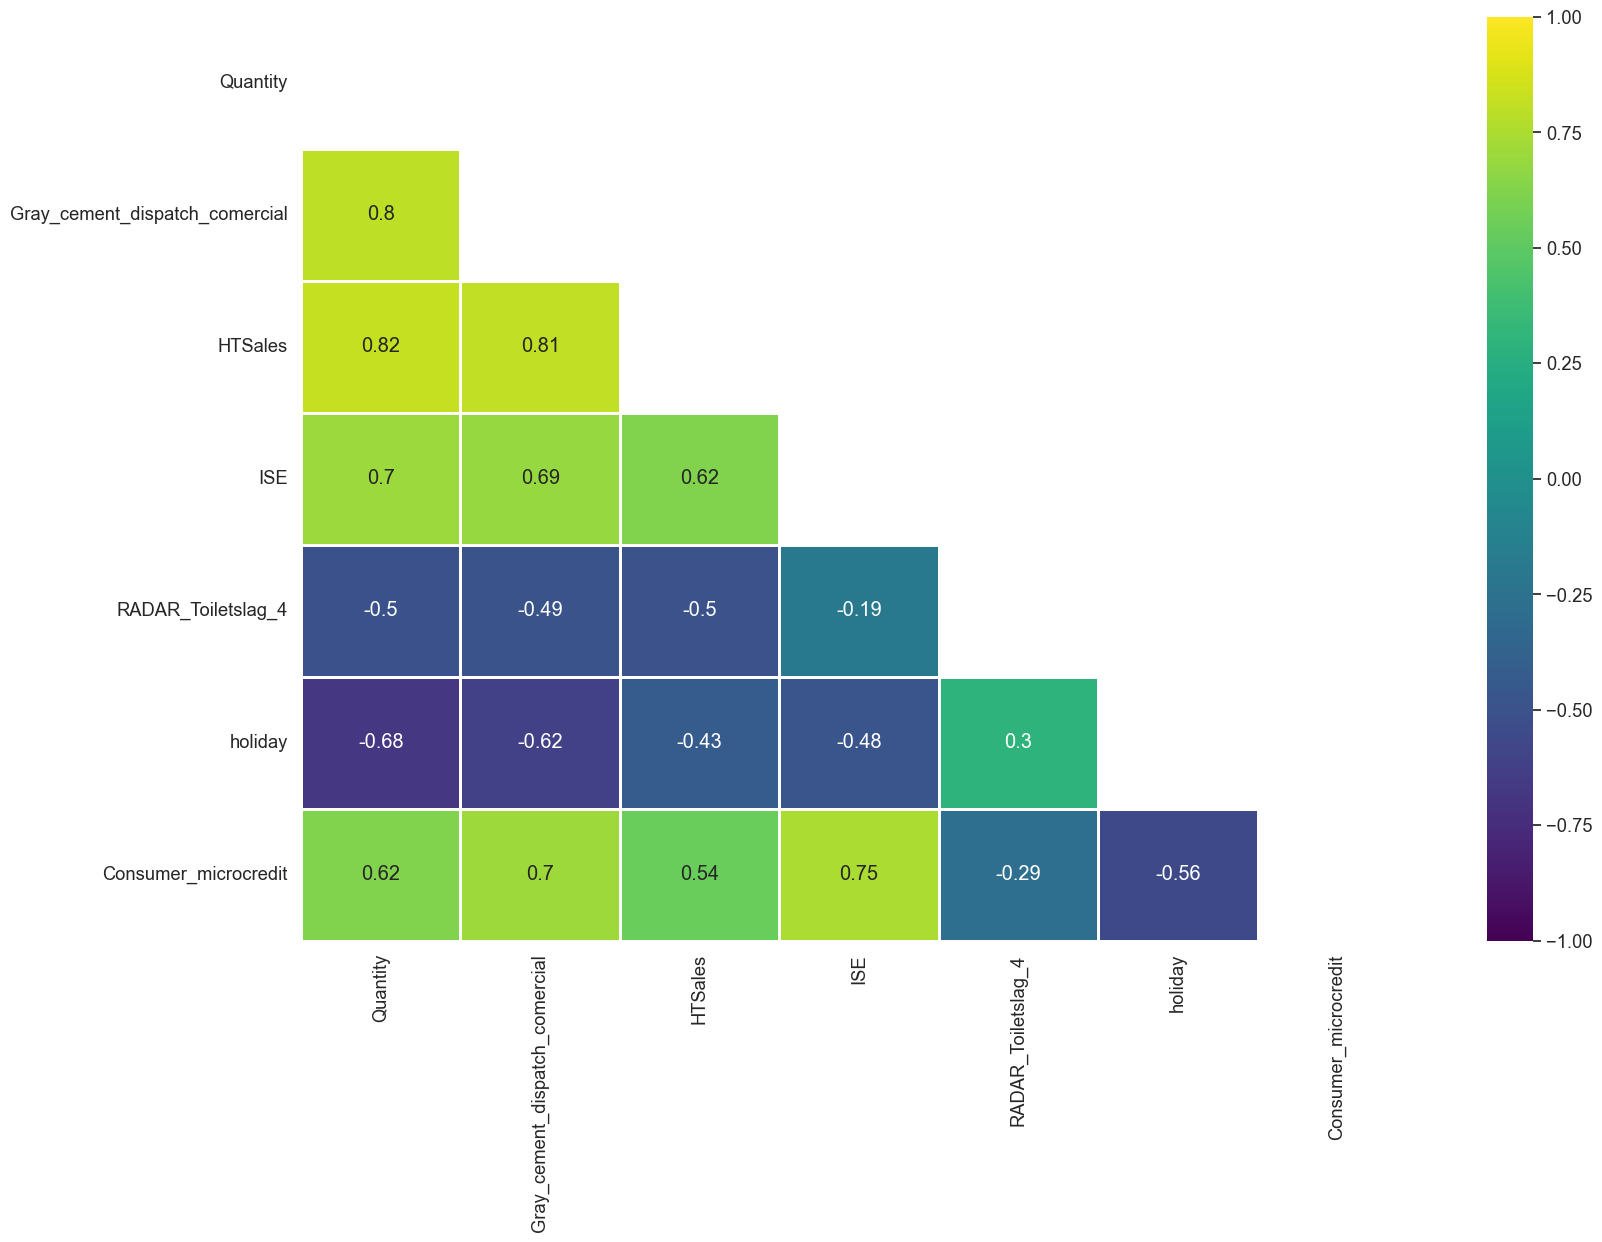

In [16]:
# new heat map
combined_var10_Correlation = corona_combined_var10.corr() 
plt.figure(figsize=(18,12))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(combined_var10_Correlation, dtype=bool))
sns.heatmap(combined_var10_Correlation, vmin=-1, vmax=1, annot=True, linewidths=1, cmap='viridis', mask=mask)

In [17]:
import plotly.graph_objs as go

# MinMax nomalizing the data and then create a multiple lines chart
df =  Created_Functions.nomalization(corona_combined_var10)
traces = [go.Scatter(
        x = df.index,
        y = df[colname],
        mode = 'markers+lines',
        name = colname            
        ) for colname in list(df.columns)]

layout = go.Layout(title='Top 10 fluctuation (data Nomalization)')
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [18]:
import plotly.graph_objs as go

# MinMax nomalizing the data and then create a multiple lines chart
df =  Created_Functions.standardization(corona_combined_var10)
traces = [go.Scatter(
        x = df.index,
        y = df[colname],
        mode = 'markers+lines',
        name = colname            
        ) for colname in list(df.columns)]

layout = go.Layout(title='Top 10 fluctuation (data Standardization)')
fig = go.Figure(data=traces, layout=layout)
fig.show()

# BIG CHANGE: 1. Data splitting

In [19]:
# use the function from Created_Functions.py
X_train, X_test, y_train, y_test = Created_Functions.data_split(corona_combined_var10, 0.3, 5)

In [20]:
y_train

date
2021-12-01    0.757456
2019-01-01    0.250076
2017-05-01   -0.638951
2019-02-01    0.367863
2017-01-01    1.115820
2017-06-01   -0.198644
2021-11-01    0.857353
2020-06-01   -1.485575
2020-10-01    0.950973
2019-10-01    0.293275
2020-02-01    0.443357
2021-04-01    0.668183
2019-09-01    0.052932
2017-11-01   -0.662947
2021-06-01    1.271338
2018-07-01   -0.258384
2018-11-01    0.166010
2018-09-01    0.131752
2021-10-01    0.904021
2017-02-01    1.098511
2017-12-01   -1.550499
2018-02-01   -0.301346
2021-02-01    0.785187
2020-11-01    0.952116
2021-03-01    0.819130
2018-04-01   -0.159144
2018-01-01   -0.392656
2017-08-01   -0.248960
2021-08-01    1.180197
2019-07-01    0.518011
2021-01-01    1.340642
2019-04-01   -1.124711
2020-04-01   -4.676741
2020-01-01    0.767097
2017-09-01   -0.706704
2017-10-01   -0.655682
2018-05-01    0.132134
2021-07-01    1.205108
2020-03-01   -2.098957
2020-12-01    0.852812
2018-03-01   -0.527666
2019-12-01   -0.181179
Name: Quantity, dtype: float6

# 2. Data transformation (using training set parameter)

### MinMax Normalization

In [21]:
normalized_x_train, normalized_x_test = Created_Functions.MinMax_Nomal(X_train, X_test)

In [22]:
normalized_x_train

Gray_cement_dispatch_comercial   HTSales       ISE  \
date                                                             
2021-12-01                        0.969897  0.851117  1.000000   
2019-01-01                        0.667994  0.508488  0.658125   
2017-05-01                        0.701440  0.458141  0.505533   
2019-02-01                        0.646128  0.496704  0.656898   
2017-01-01                        0.659120  0.623768  0.484461   
2017-06-01                        0.677841  0.447990  0.558790   
2021-11-01                        0.981758  0.889738  0.951299   
2020-06-01                        0.687499  0.490695  0.274668   
2020-10-01                        0.955961  0.985473  0.575244   
2019-10-01                        0.825335  0.592439  0.731101   
2020-02-01                        0.683711  0.669331  0.771499   
2021-04-01                        0.855451  0.923167  0.688078   
2019-09-01                        0.838334  0.581238  0.692882   
2017-11-01                        0.747592  0.400502  0.538487   
2021-06-01                        0.886393  0.772359  0.745854   
2018-07-01                        0.707686  0.472318  0.581950   
2018-11-01                        0.798064  0.507730  0.649589   
2018-09-01                        0.733022  0.519981  0.617752   
2021-10-01                        0.941241  0.856893  0.903429   
2017-02-01                        0.720293  0.566595  0.498157   
2017-12-01                        0.699370  0.340762  0.571942   
2018-02-01                        0.654515  0.561402  0.542755   
2021-02-01                        0.859830  0.838224  0.714605   
2020-11-01                        0.937074  1.000000  0.598431   
2021-03-01                        1.000000  0.979989  0.752473   
2018-04-01                        0.790574  0.487136  0.556191   
2018-01-01                        0.657409  0.461058  0.537504   
2017-08-01                        0.739927  0.516423  0.535733   
2021-08-01                        0.852487  0.887054  0.790891   
2019-07-01                        0.846561  0.569045  0.726935   
2021-01-01                        0.808239  0.792136  0.676612   
2019-04-01                        0.744222  0.520506  0.693537   
2020-04-01                        0.000000  0.000000  0.000000   
2020-01-01                        0.798009  0.768100  0.812709   
2017-09-01                        0.727808  0.423896  0.525944   
2017-10-01                        0.745202  0.390992  0.513375   
2018-05-01                        0.663551  0.475410  0.582783   
2021-07-01                        0.918610  0.857068  0.817334   
2020-03-01                        0.395162  0.248410  0.428875   
2020-12-01                        0.891705  0.934718  0.631568   
2018-03-01                        0.702379  0.484919  0.616367   
2019-12-01                        0.855574  0.709994  0.738687   

            RADAR_Toiletslag_4   holiday  Consumer_microcredit  
date                                                            
2021-12-01            0.383052  0.269231              1.000000  
2019-01-01            0.449953  0.076923              0.769888  
2017-05-01            1.000000  0.076923              0.766865  
2019-02-01            0.360258  0.000000              0.717679  
2017-01-01            0.427791  0.038462              0.430351  
2017-06-01            0.239507  0.076923              0.648841  
2021-11-01            0.698698  0.076923              0.788547  
2020-06-01            0.467776  0.115385              0.342519  
2020-10-01            0.000000  0.038462              0.760859  
2019-10-01            0.501643  0.038462              0.965024  
2020-02-01            0.417771  0.000000              0.781462  
2021-04-01            0.907727  0.076923              0.677233  
2019-09-01            0.624017  0.000000              0.716597  
2017-11-01            0.763460  0.076923              0.890382  
2021-06-01            0.147433  0.076923              0.746293  
20

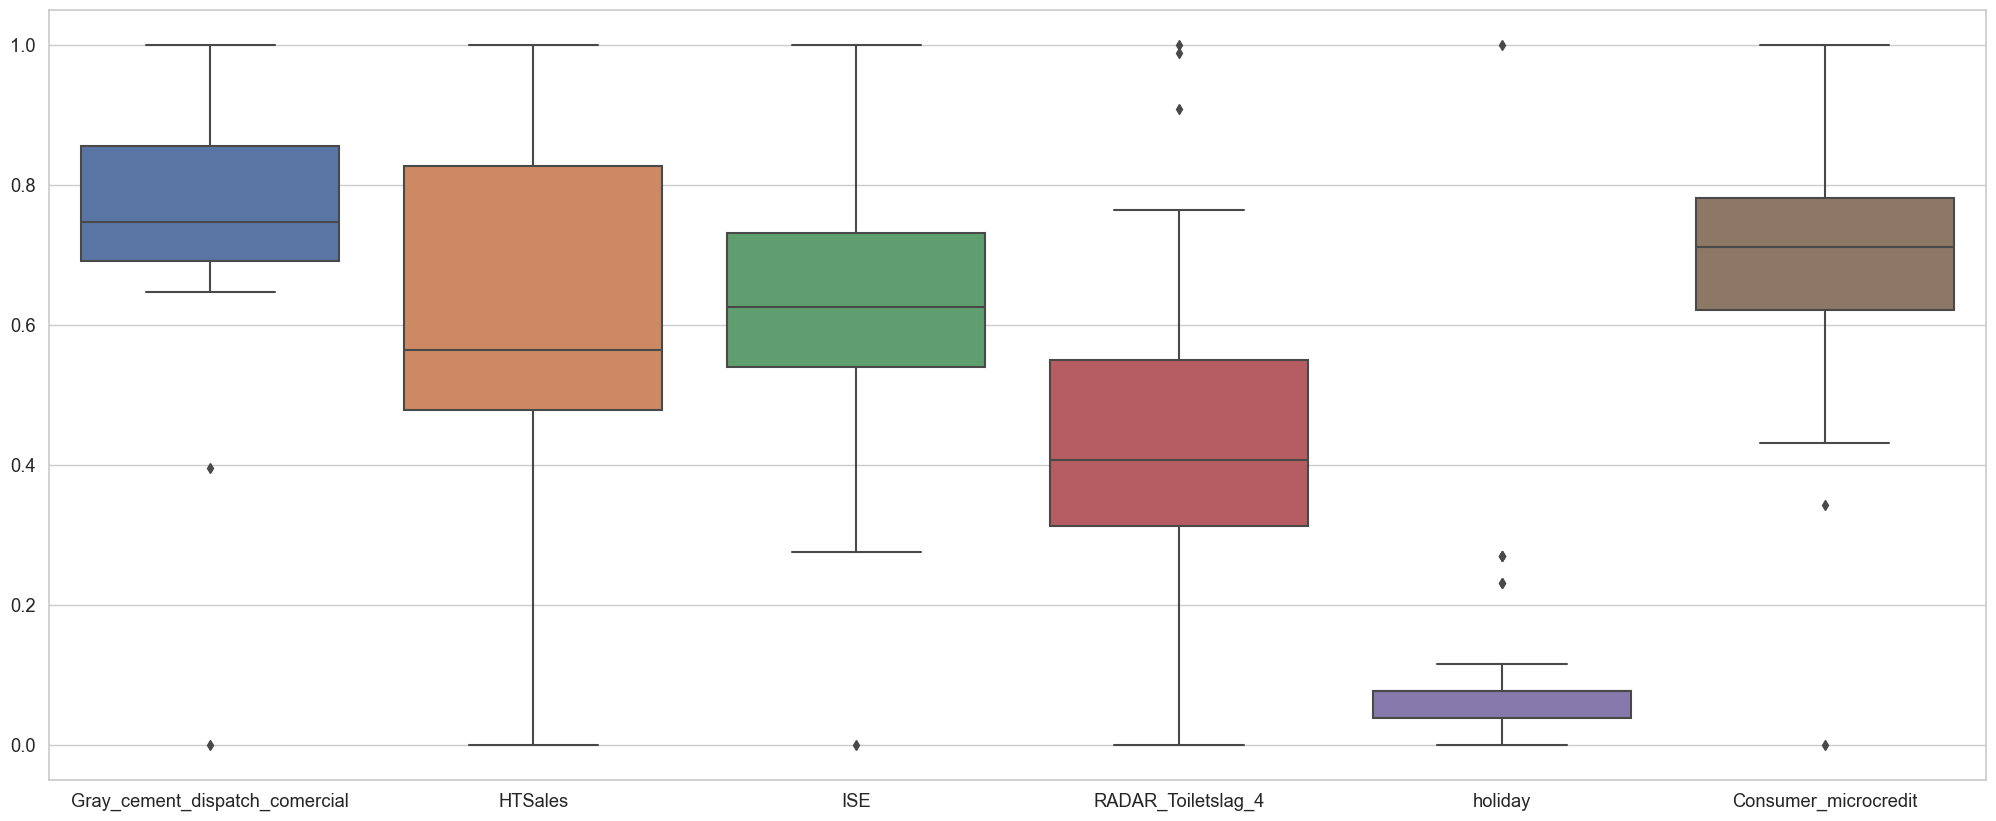

In [23]:
plt.figure(figsize=(25,10))
sns.boxplot(x="variable", y="value",data = normalized_x_train.melt()) #Explore melt function of pandas
plt.xlabel('') #Erase labels
plt.ylabel('') #Erase label
plt.show()

### Standardization

In [24]:
standarded_x_train, standarded_x_test = Created_Functions.Standard(X_train, X_test)

In [25]:
standarded_x_train

Gray_cement_dispatch_comercial   HTSales       ISE  \
date                                                             
2021-12-01                        1.244041  1.068321  2.181413   
2019-01-01                       -0.556128 -0.486920  0.167234   
2017-05-01                       -0.356701 -0.715453 -0.731766   
2019-02-01                       -0.686510 -0.540412  0.160008   
2017-01-01                       -0.609044  0.036349 -0.855917   
2017-06-01                       -0.497414 -0.761530 -0.418000   
2021-11-01                        1.314768  1.243627  1.894487   
2020-06-01                       -0.439824 -0.567688 -2.091922   
2020-10-01                        1.160945  1.678183 -0.321064   
2019-10-01                        0.382056 -0.105855  0.597178   
2020-02-01                       -0.462411  0.243167  0.835186   
2021-04-01                        0.561629  1.395364  0.343704   
2019-09-01                        0.459564 -0.156699  0.372011   
2017-11-01                       -0.081506 -0.977087 -0.537615   
2021-06-01                        0.746131  0.710825  0.684097   
2018-07-01                       -0.319457 -0.651103 -0.281556   
2018-11-01                        0.219448 -0.490363  0.116945   
2018-09-01                       -0.168383 -0.434752 -0.070623   
2021-10-01                        1.073174  1.094538  1.612457   
2017-02-01                       -0.244283 -0.223167 -0.775225   
2017-12-01                       -0.369039 -1.248255 -0.340518   
2018-02-01                       -0.636502 -0.246735 -0.512474   
2021-02-01                        0.587740  1.009798  0.499994   
2020-11-01                        1.048326  1.744122 -0.184454   
2021-03-01                        1.423538  1.653291  0.723090   
2018-04-01                        0.174786 -0.583841 -0.433311   
2018-01-01                       -0.619241 -0.702212 -0.543409   
2017-08-01                       -0.127213 -0.450906 -0.553846   
2021-08-01                        0.543958  1.231445  0.949437   
2019-07-01                        0.508620 -0.212045  0.572635   
2021-01-01                        0.280119  0.800596  0.276156   
2019-04-01                       -0.101598 -0.432369  0.375871   
2020-04-01                       -4.539204 -2.795022 -3.710145   
2020-01-01                        0.219119  0.691494  1.077980   
2017-09-01                       -0.199470 -0.870897 -0.611513   
2017-10-01                       -0.095755 -1.020251 -0.685567   
2018-05-01                       -0.582623 -0.637068 -0.276646   
2021-07-01                        0.938232  1.095332  1.105227   
2020-03-01                       -2.182953 -1.667452 -1.183405   
2020-12-01                        0.777802  1.447797  0.010773   
2018-03-01                       -0.351101 -0.593904 -0.078782   
2019-12-01                        0.562364  0.427741  0.641875   

            RADAR_Toiletslag_4   holiday  Consumer_microcredit  
date                                                            
2021-12-01           -0.239716  1.069722              1.794527  
2019-01-01            0.052121 -0.144557              0.439155  
2017-05-01            2.451543 -0.144557              0.421350  
2019-02-01           -0.339148 -0.630268              0.131643  
2017-01-01           -0.044554 -0.387413             -1.560733  
2017-06-01           -0.865891 -0.144557             -0.273816  
2021-11-01            1.137198 -0.144557              0.549060  
2020-06-01            0.129869  0.098299             -2.078073  
2020-10-01           -1.910671 -0.387413              0.385974  
2019-10-01            0.277601 -0.387413              1.588515  
2020-02-01           -0.088266 -0.630268              0.507327  
2021-04-01            2.049027 -0.144557             -0.106589  
2019-09-01            0.811426 -0.630268              0.125271  
2017-11-01            1.419706 -0.144557              1.148872  
2021-06-01           -1.267535 -0.144557              0.300179  
20

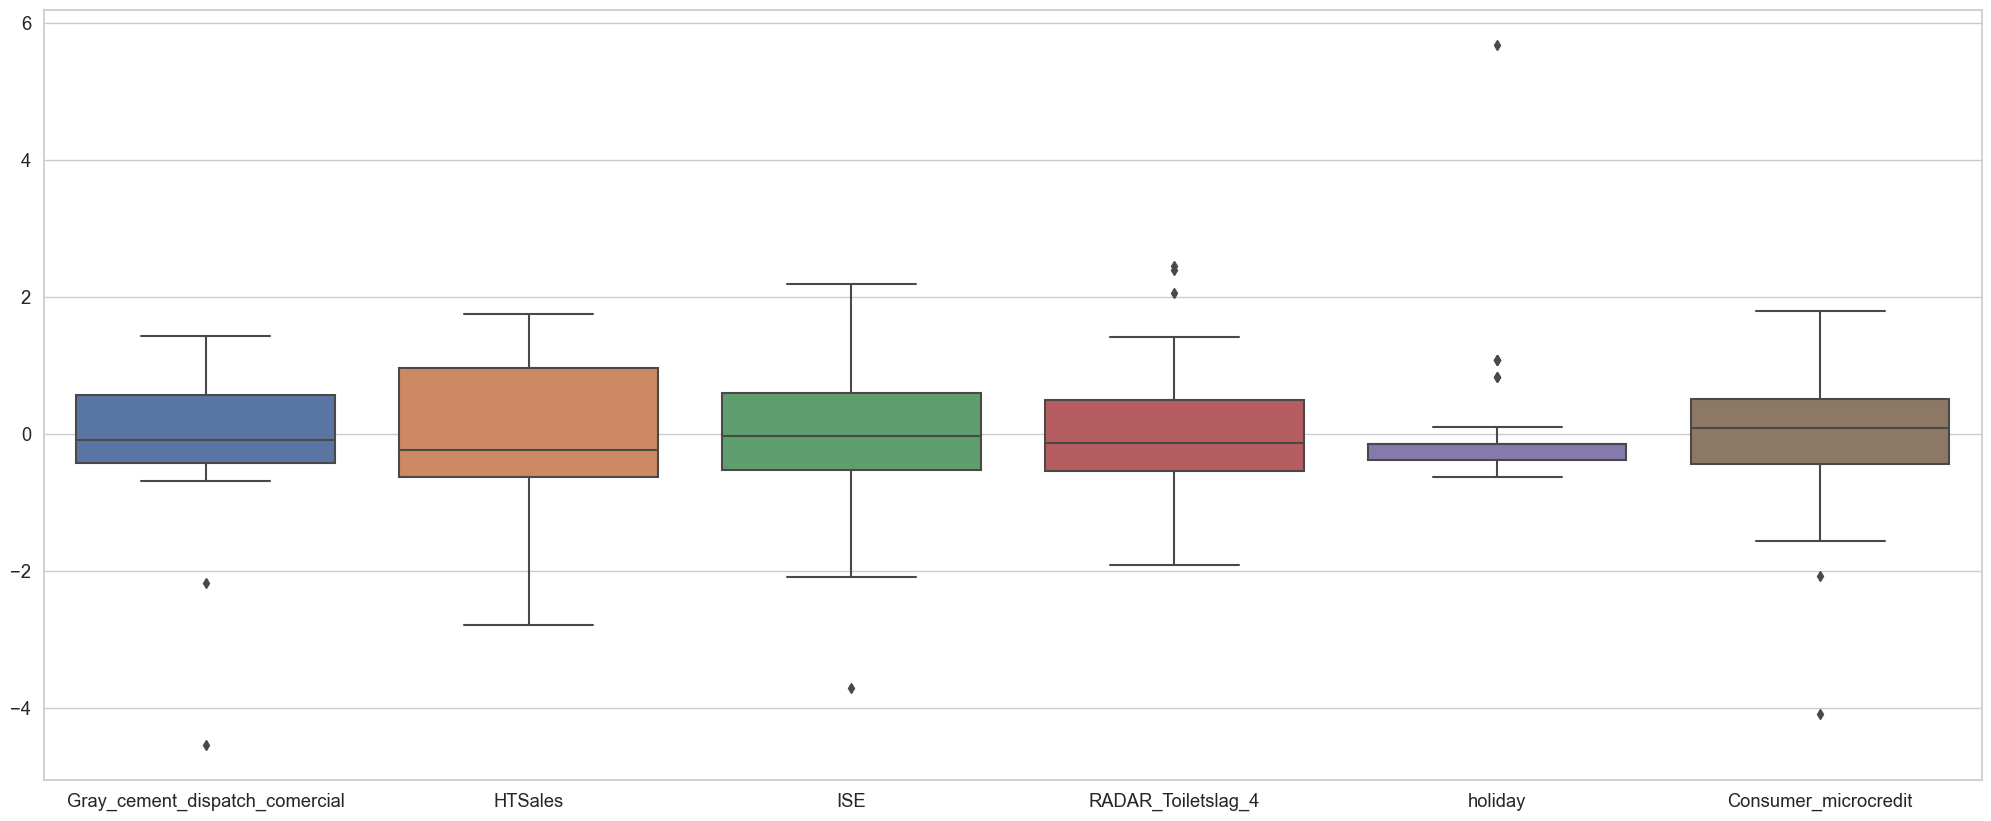

In [26]:
plt.figure(figsize=(25,10))
sns.boxplot(x="variable", y="value",data = standarded_x_train.melt()) #Explore melt function of pandas
plt.xlabel('') #Erase labels
plt.ylabel('') #Erase label
plt.show()

### Centering

In [27]:
centered_x_train, centered_x_test = Created_Functions.Center(X_train, X_test)

In [28]:
centered_x_train

Gray_cement_dispatch_comercial       HTSales        ISE  \
date                                                                  
2021-12-01                    98024.286319   4034.261905  11.672551   
2019-01-01                   -43820.185633  -1838.738095   0.894855   
2017-05-01                   -28106.266633  -2701.738095  -3.915619   
2019-02-01                   -54093.593633  -2040.738095   0.856190   
2017-01-01                   -47989.653633    137.261905  -4.579939   
2017-06-01                   -39193.756133  -2875.738095  -2.236681   
2021-11-01                   103597.243879   4696.261905  10.137234   
2020-06-01                   -34655.977686  -2143.738095 -11.193693   
2020-10-01                    91476.762439   6337.261905  -1.717983   
2019-10-01                    30104.147867   -399.738095   3.195446   
2020-02-01                   -36435.735633    918.261905   4.469010   
2021-04-01                    44253.596294   5269.261905   1.839132   
2019-09-01                    36211.395367   -591.738095   1.990599   
2017-11-01                    -6422.248133  -3689.738095  -2.876731   
2021-06-01                    58791.455514   2684.261905   3.660543   
2018-07-01                   -25171.622133  -2458.738095  -1.506580   
2018-11-01                    17291.432867  -1851.738095   0.625763   
2018-09-01                   -13267.780633  -1641.738095  -0.377896   
2021-10-01                    84560.838875   4133.261905   8.628120   
2017-02-01                   -19248.324133   -842.738095  -4.148163   
2017-12-01                   -29078.492133  -4713.738095  -1.822084   
2018-02-01                   -50153.218633   -931.738095  -2.742202   
2021-02-01                    46311.054407   3813.261905   2.675424   
2020-11-01                    82602.944485   6586.261905  -0.986995   
2021-03-01                   112167.774015   6243.261905   3.869193   
2018-04-01                    13772.267867  -2204.738095  -2.318611   
2018-01-01                   -48793.174133  -2651.738095  -2.907733   
2017-08-01                   -10023.739633  -1702.738095  -2.963582   
2021-08-01                    42861.195897   4650.261905   5.080358   
2019-07-01                    40076.742867   -800.738095   3.064120   
2021-01-01                    22071.992464   3023.261905   1.477686   
2019-04-01                    -8005.406133  -1632.738095   2.011251   
2020-04-01                  -357667.008133 -10554.738095 -19.852666   
2020-01-01                    17265.532867   2611.261905   5.768177   
2017-09-01                   -15717.295633  -3288.738095  -3.272155   
2017-10-01                    -7544.991133  -3852.738095  -3.668412   
2018-05-01                   -45907.802249  -2405.738095  -1.480309   
2021-07-01                    73928.046387   4136.261905   5.913972   
2020-03-01                  -172005.959133  -6296.738095  -6.332300   
2020-12-01                    61287.003247   5467.261905   0.057646   
2018-03-01                   -27665.038327  -2242.738095  -0.421555   
2019-12-01                    44311.555367   1615.261905   3.434617   

            RADAR_Toiletslag_4    holiday  Consumer_microcredit  
date                                                             
2021-12-01       -4.557950e+09   4.404762         209087.194512  
2019-01-01        9.910236e+08  -0.595238          51167.591992  
2017-05-01        4.661348e+10  -0.595238          49093.104992  
2019-02-01       -6.448533e+09  -2.595238          15338.275792  
2017-01-01       -8.471556e+08  -1.595238        -181846.981308  
2017-06-01       -1.646400e+10  -0.595238         -31903.313108  
2021-11-01        2.162260e+10  -0.595238          63973.059622  
2020-06-01        2.469322e+09   0.404762        -242124.232128  
2020-10-01       -3.632938e+10  -1.595238          44971.279742  
2019-10-01        5.278289e+09  -1.595238         185084.047892  
2020-02-01       -1.678279e+09  -2.595238          59110.593692  
2021-04-01        3.896007e+1

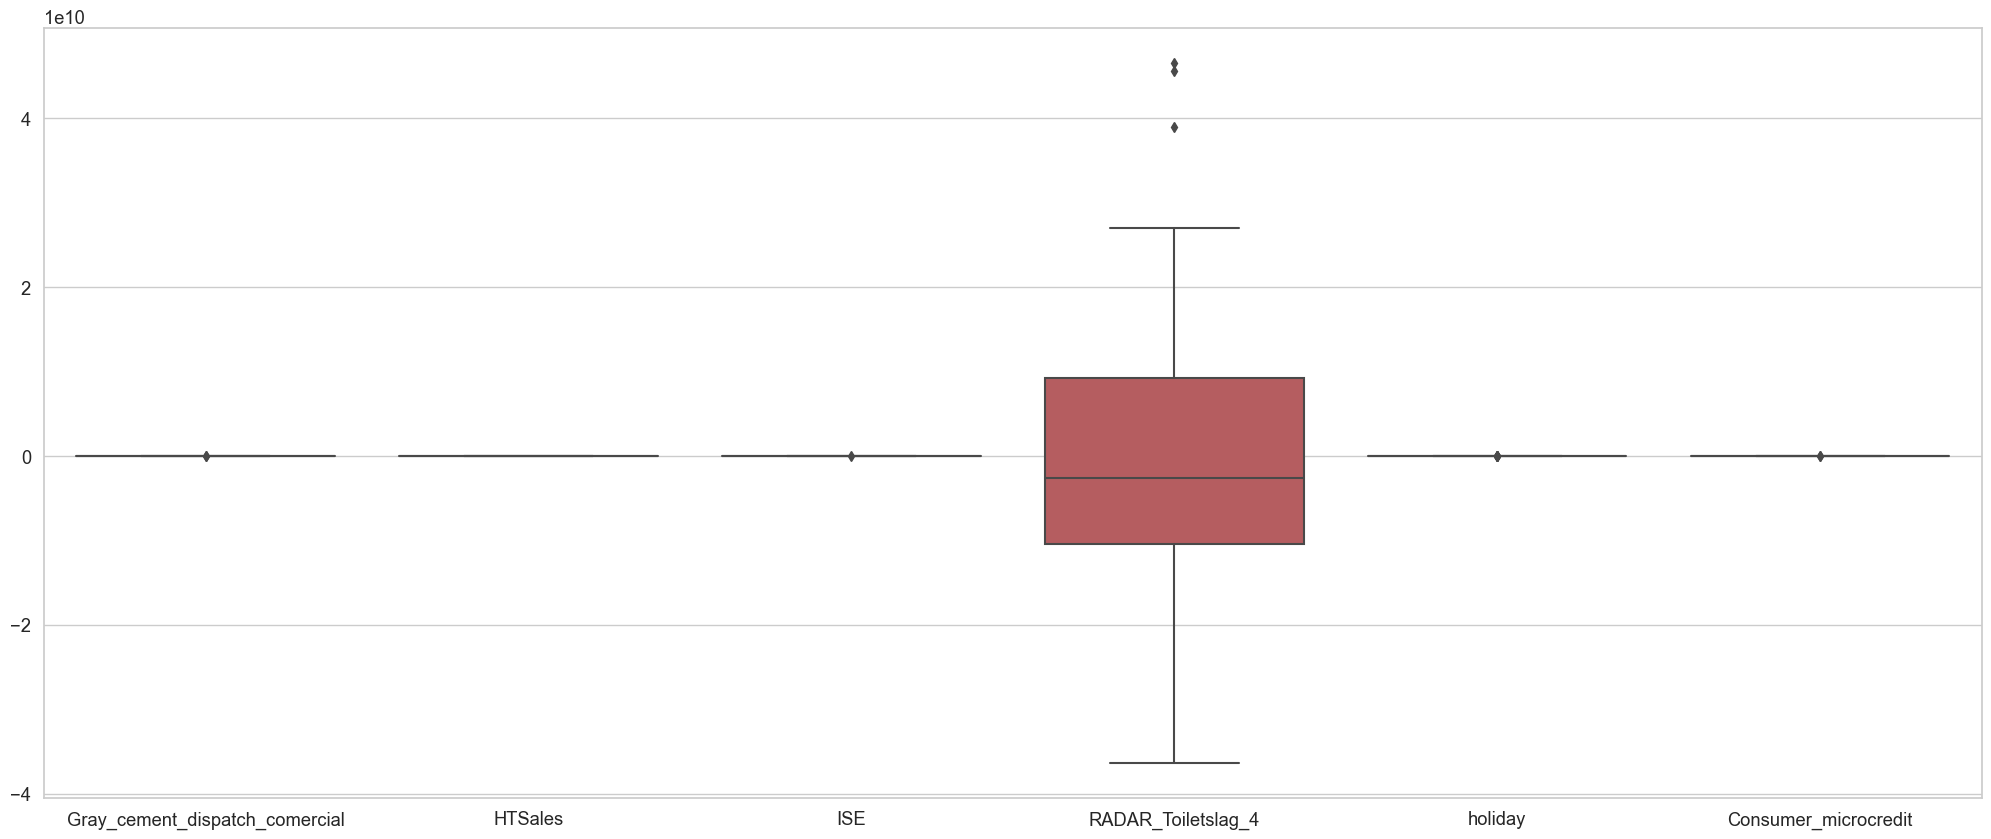

In [29]:
plt.figure(figsize=(25,10))
sns.boxplot(x="variable", y="value",data = centered_x_train.melt()) #Explore melt function of pandas
plt.xlabel('') #Erase labels
plt.ylabel('') #Erase label
plt.show()

# 3. Linear Modeling

In [30]:
# original data + linear regression
Created_Functions.linearR(X_train, X_test, y_train, y_test)

Linear regression: 
Intercept: -4.929883925266408
Coefficients: [-2.30040033e-06  1.77340371e-04  3.71026902e-02 -5.31631991e-12
 -1.12093301e-01  3.97641551e-07]
 
training metrics:  0.8636252012776204     testing metrics:  0.6496145213287261
 


In [31]:
# MinMax Normalized data + linear regression
Created_Functions.linearR(normalized_x_train, normalized_x_test, y_train, y_test)

Linear regression: 
Intercept: -1.4433733062565783
Coefficients: [-1.08080809  3.03979129  1.16967036 -0.44095081 -2.91442582  0.27289045]
 
training metrics:  0.8636252012776204     testing metrics:  0.649614521555695
 


In [32]:
# standarded data + linear regression
Created_Functions.linearR(standarded_x_train, standarded_x_test, y_train, y_test)

Linear regression: 
Intercept: 0.04791911181515887
Coefficients: [-0.18126025  0.66968392  0.19853329 -0.10108417 -0.46156335  0.04633075]
 
training metrics:  0.8636252012776204     testing metrics:  0.6496145215556948
 


In [33]:
# centered data + linear regression
Created_Functions.linearR(centered_x_train, centered_x_test, y_train, y_test)

Linear regression: 
Intercept: 0.04791911181515782
Coefficients: [-2.30040033e-06  1.77340371e-04  3.71026902e-02 -5.31631987e-12
 -1.12093301e-01  3.97641551e-07]
 
training metrics:  0.8636252012776204     testing metrics:  0.649614521442552
 


### ridge

In [34]:
# original data + ridge regression
Created_Functions.ridgeR(X_train, X_test, y_train, y_test, 0.1)

Ridge regression: 
Intercept: -4.929394757229991
Coefficients: [-2.29860293e-06  1.77326974e-04  3.70893398e-02 -5.31710706e-12
 -1.12061998e-01  3.98029345e-07]
 
training metrics:  0.8636251934432368     testing metrics:  0.6496677521758865
 


In [35]:
# MinMax Normalized data + ridge regression
Created_Functions.ridgeR(normalized_x_train, normalized_x_test, y_train, y_test, 0.1)

Ridge regression: 
Intercept: -1.8224859110054223
Coefficients: [ 0.04450121  2.40751379  0.99822944 -0.53146579 -2.3293442   0.27432483]
 
training metrics:  0.8578367056008038     testing metrics:  0.7116392251008659
 


In [36]:
# standarded data + ridge regression
Created_Functions.ridgeR(standarded_x_train, standarded_x_test, y_train, y_test, 0.1)

Ridge regression: 
Intercept: 0.04791911181515886
Coefficients: [-0.16909975  0.6602045   0.19759846 -0.10230679 -0.45714181  0.04522253]
 
training metrics:  0.8636047575727384     testing metrics:  0.65574483610502
 


In [37]:
# centered data + ridge regression
Created_Functions.ridgeR(centered_x_train, centered_x_test, y_train, y_test, 0.1)

Ridge regression: 
Intercept: 0.04791911181515782
Coefficients: [-2.29860293e-06  1.77326974e-04  3.70893398e-02 -5.31710706e-12
 -1.12061998e-01  3.98029345e-07]
 
training metrics:  0.8636251934432368     testing metrics:  0.6496677521758842
 


### lasso

In [38]:
# original data + lasso regression
Created_Functions.lassoR(X_train, X_test, y_train, y_test, 0.01)

Lasso regression: 
Intercept: -4.842906048033208
Coefficients: [-2.21367119e-06  1.77111889e-04  3.57257277e-02 -5.34108462e-12
 -1.10874923e-01  4.30180521e-07]
 
training metrics:  0.8636038653170665     testing metrics:  0.6504354836302113
 


In [39]:
# MinMax Normalized data + lasso regression
Created_Functions.lassoR(normalized_x_train, normalized_x_test, y_train, y_test, 0.01)

Lasso regression: 
Intercept: -1.6963827020001225
Coefficients: [ 0.          2.61552483  0.84516033 -0.36665975 -2.38301417  0.        ]
 
training metrics:  0.8555328782955597     testing metrics:  0.7367502329362123
 


In [40]:
# standarded data + lasso regression
Created_Functions.lassoR(standarded_x_train, standarded_x_test, y_train, y_test, 0.01)

Lasso regression: 
Intercept: 0.047919111815158594
Coefficients: [-0.0231783   0.58024132  0.17186101 -0.09907344 -0.41701488  0.01498756]
 
training metrics:  0.8607273769063419     testing metrics:  0.706802625922886
 


In [41]:
# centered data + lasso regression
Created_Functions.lassoR(centered_x_train, centered_x_test, y_train, y_test, 0.01)

Lasso regression: 
Intercept: 0.047919111815157824
Coefficients: [-2.21367119e-06  1.77111889e-04  3.57257277e-02 -5.34108462e-12
 -1.10874923e-01  4.30180521e-07]
 
training metrics:  0.8636038653170665     testing metrics:  0.6504354836302118
 


### elasticnet

In [42]:
# original data + elasticnet regression
Created_Functions.elasticnetR(X_train, X_test, y_train, y_test, 0.01, 1)

ElasticNet regression: 
Intercept: -4.842906048033208
Coefficients: [-2.21367119e-06  1.77111889e-04  3.57257277e-02 -5.34108462e-12
 -1.10874923e-01  4.30180521e-07]
 
training metrics:  0.8636038653170665     testing metrics:  0.6504354836302113
 


In [43]:
# MinMax Normalized data + elasticnet regression
Created_Functions.elasticnetR(normalized_x_train, normalized_x_test, y_train, y_test, 0.01, 1)

ElasticNet regression: 
Intercept: -1.6963827020001225
Coefficients: [ 0.          2.61552483  0.84516033 -0.36665975 -2.38301417  0.        ]
 
training metrics:  0.8555328782955597     testing metrics:  0.7367502329362123
 


In [44]:
# standarded data + elasticnet regression
Created_Functions.elasticnetR(standarded_x_train, standarded_x_test, y_train, y_test, 0.01, 1)

ElasticNet regression: 
Intercept: 0.047919111815158594
Coefficients: [-0.0231783   0.58024132  0.17186101 -0.09907344 -0.41701488  0.01498756]
 
training metrics:  0.8607273769063419     testing metrics:  0.706802625922886
 


In [45]:
# centered data + elasticnet regression
Created_Functions.elasticnetR(centered_x_train, centered_x_test, y_train, y_test, 0.01, 1)

ElasticNet regression: 
Intercept: 0.047919111815157824
Coefficients: [-2.21367119e-06  1.77111889e-04  3.57257277e-02 -5.34108462e-12
 -1.10874923e-01  4.30180521e-07]
 
training metrics:  0.8636038653170665     testing metrics:  0.6504354836302118
 


### Decision Tree

In [46]:
# original data + Decision Tree 
Created_Functions.decisionTree(X_train, X_test, y_train, y_test, 1.0)

Decision Tree: 
 
training metrics:  1.0     testing metrics:  -0.2131586977686184
 


In [47]:
# MinMax Normalized data + Decision Tree
Created_Functions.decisionTree(normalized_x_train, normalized_x_test, y_train, y_test, 1.0)

Decision Tree: 
 
training metrics:  1.0     testing metrics:  -0.45499408069205494
 


In [48]:
# standarded data + Decision Tree
Created_Functions.decisionTree(standarded_x_train, standarded_x_test, y_train, y_test, 1.0)

Decision Tree: 
 
training metrics:  1.0     testing metrics:  -0.19374473681072835
 


In [49]:
# centered data + Decision Tree
Created_Functions.decisionTree(centered_x_train, centered_x_test, y_train, y_test, 1.0)

Decision Tree: 
 
training metrics:  1.0     testing metrics:  0.09654437284577
 


# 4. Non Linear Modeling

In [50]:
# DecisionTreeRegressor(), *KNeighborsRegressor(), *RandomForestRegressor(), *ExtraTreesRegressor(), 
# *GradientBoostingRegressor(), *XGBRegressor(), *CatBoostRegressor(), *LGBMRegressor()

In [51]:
# reassign the X and y for Non Linear Modeling
X = corona_combined_var10.drop(['Quantity'], axis=1)
y = corona_combined_var10['Quantity']

<font color = 'green'><b>KNN 

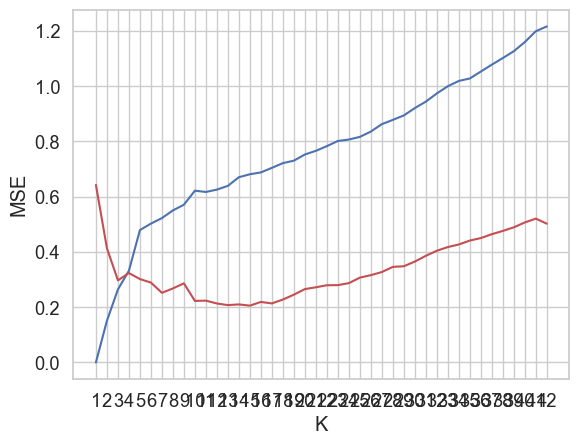

In [52]:
train_mse = []
test_mse = []
K = list(range(1,43))

for k in K:

    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(standarded_x_train,y_train)
    
    y_pred_Train = model.predict(standarded_x_train) #Predictions
    y_pred_Test = model.predict(standarded_x_test) #Predictions
        
    train_mse.append(metrics.mean_squared_error(y_train, y_pred_Train))
    test_mse.append(metrics.mean_squared_error(y_test, y_pred_Test))
    
       
plt.plot(K,train_mse,'b')
plt.plot(K,test_mse,'r')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xticks(K)
plt.show()

Test Metrics:
R squared: 0.4456501796787138
Mean Absolute Error: 0.6553309836645614
Mean Squared Error: 1.2499341245715856
Root Mean Squared Error: 1.1180045279745452


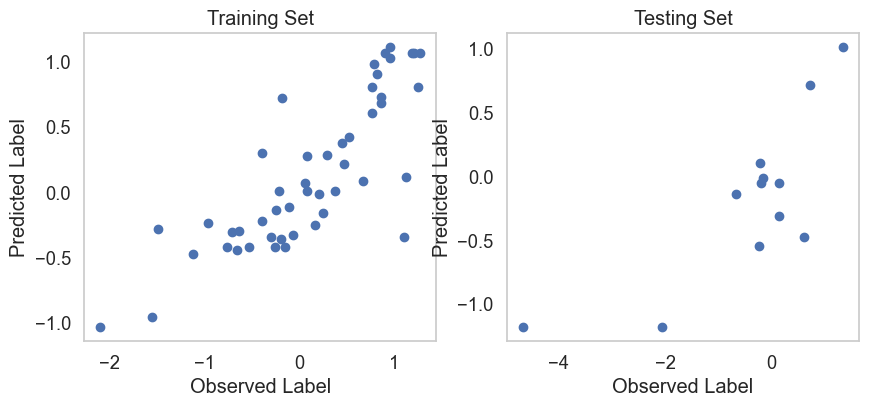

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 216.83it/s]


Train MSE median: 0.34378467827095505
Test MSE median: 0.3979545760736163

Train_R2 median: 0.6724124443205943
Test_R2 median: 0.4924470398852741


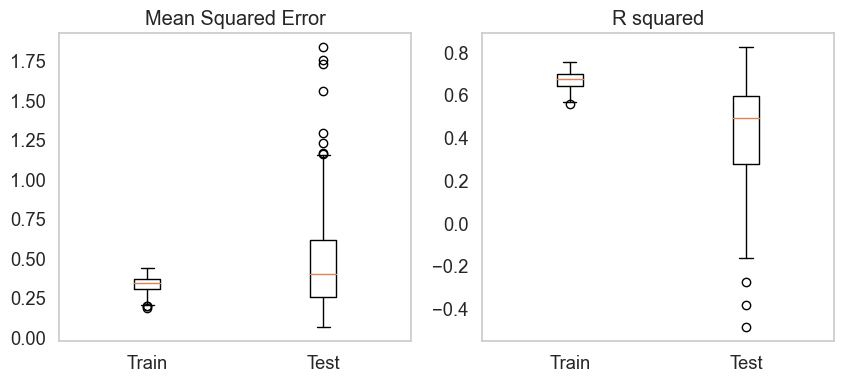

Train MSE standard deviation: 0.060007607829686234
Test MSE standard deviation:  0.39248251604102474

Train_R2 standard deviation: 0.040991247269865035
Test_R2 standard deviation:  0.2386281022789952


In [53]:
model = KNeighborsRegressor(n_neighbors=5)
Created_Functions.Model_Performance(model,X,y)

<font color = 'green'><b> GradientBoosting  + standarded data

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.20it/s]


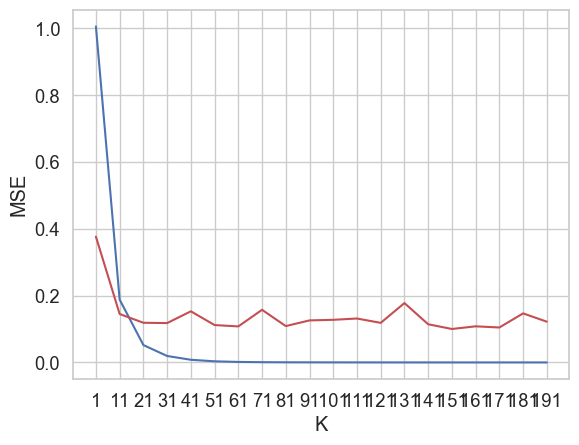

In [54]:
#GradientBoostingRegression 

train_mse = []
pred_mse = []
K = list(range(1,200,10))

for k in tqdm(K):
    
    model = GradientBoostingRegressor(n_estimators=k) #Number of trees in the forest
    model.fit(standarded_x_train, y_train.ravel()) #ravel flattens the array

    y_pred_Train = model.predict(standarded_x_train) #Predictions
    y_pred_Test = model.predict(standarded_x_test) #Predictions
        
    train_mse.append(metrics.mean_squared_error(y_train, y_pred_Train))
    pred_mse.append(metrics.mean_squared_error(y_test, y_pred_Test))
       
plt.plot(K,train_mse,'b')
plt.plot(K,pred_mse,'r')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xticks(K)
plt.show()

Test Metrics:
R squared: 0.7577487025996452
Mean Absolute Error: 0.28091887477956173
Mean Squared Error: 0.09483643585455657
Root Mean Squared Error: 0.30795524975969574


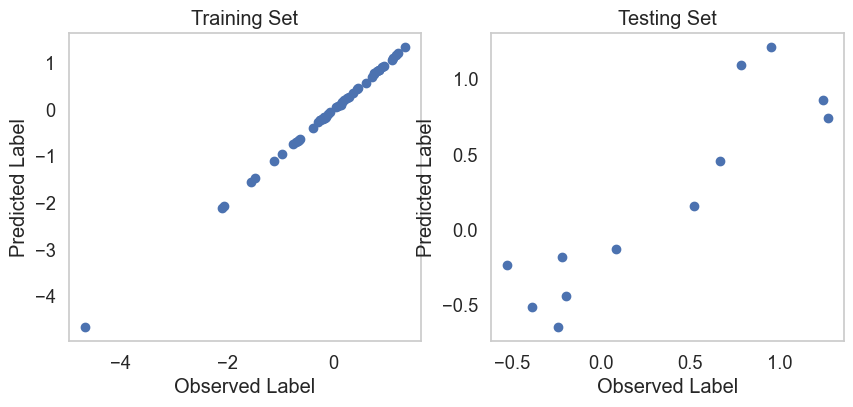

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 50.44it/s]


Train MSE median: 0.00037987579200517857
Test MSE median: 0.2836765203940111

Train_R2 median: 0.9996415158903605
Test_R2 median: 0.6145871173207613


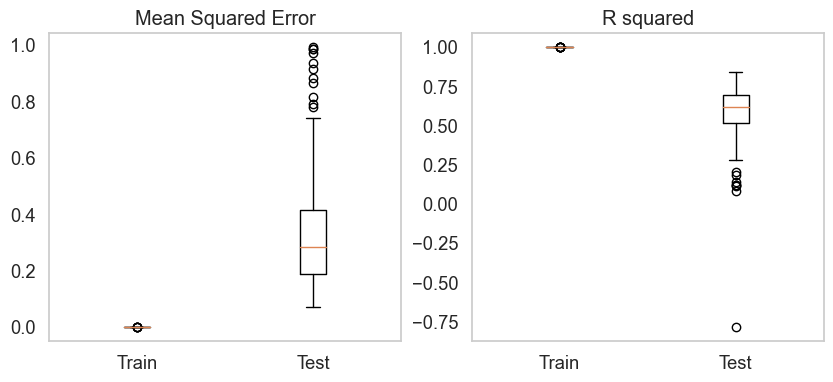

Train MSE standard deviation: 0.00016671447878529116
Test MSE standard deviation:  0.2482993279751908

Train_R2 standard deviation: 0.00017532992536655012
Test_R2 standard deviation:  0.22175458699291442


In [55]:
#multiple run
model = GradientBoostingRegressor(n_estimators=100)
Created_Functions.Model_Performance(model,X,y)

<AxesSubplot:>

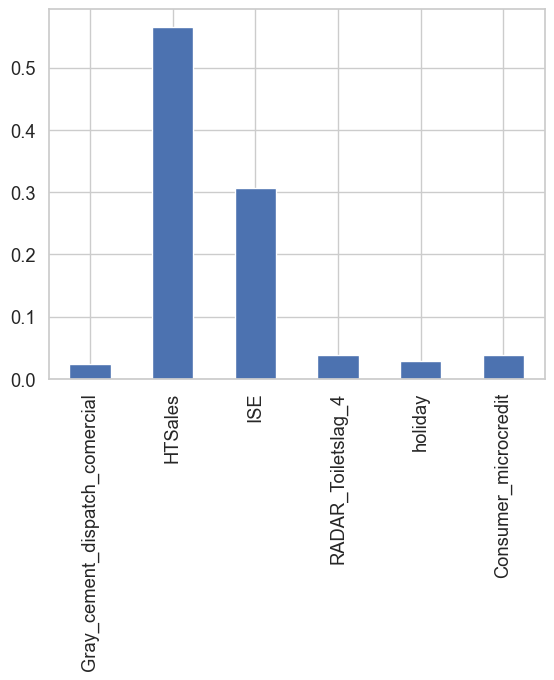

In [56]:
#Feature importance
GBR = GradientBoostingRegressor(n_estimators=100)
GBR.fit(X_train,y_train)

Features = corona_combined_var10.columns[1:8]

Feature_importances = pd.Series(GBR.feature_importances_, index=Features)
Feature_importances.plot.bar()

<font color = 'green'><b> XGBoost + standarded data

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 86.60it/s]


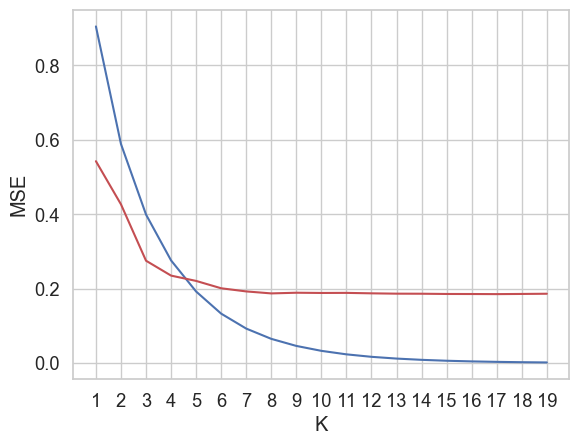

In [57]:
# XGBOOST model training curve

train_mse = []
pred_mse = []
K = list(range(1,20))

for k in tqdm(K):
    
    model = XGBRegressor(objective="reg:squarederror", n_estimators=k) #Number of trees in the forest
    model.fit(standarded_x_train, y_train.ravel()) #ravel flattens the array

    y_pred_Train = model.predict(standarded_x_train) #Predictions
    y_pred_Test = model.predict(standarded_x_test) #Predictions
        
    train_mse.append(metrics.mean_squared_error(y_train, y_pred_Train))
    pred_mse.append(metrics.mean_squared_error(y_test, y_pred_Test))
       
plt.plot(K,train_mse,'b')
plt.plot(K,pred_mse,'r')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xticks(K)
plt.show()

Test Metrics:
R squared: 0.4666648300533899
Mean Absolute Error: 0.5309622930655988
Mean Squared Error: 0.5058292453400107
Root Mean Squared Error: 0.7112167358407778


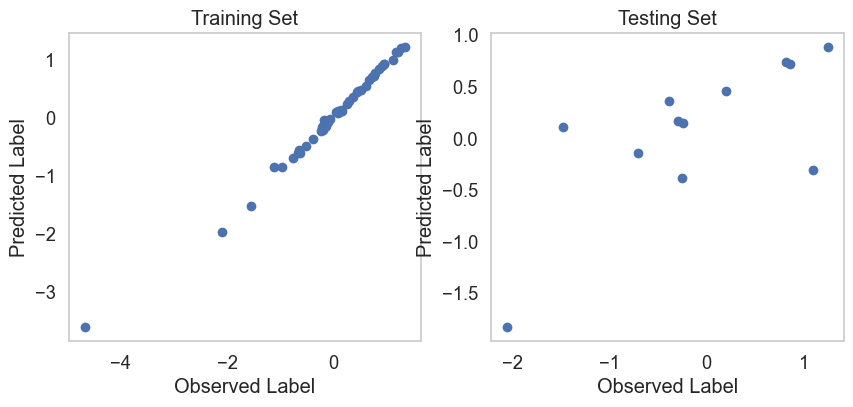

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 54.86it/s]


Train MSE median: 0.029556864866123005
Test MSE median: 0.3450741849315

Train_R2 median: 0.9730792341952106
Test_R2 median: 0.5752113825433574


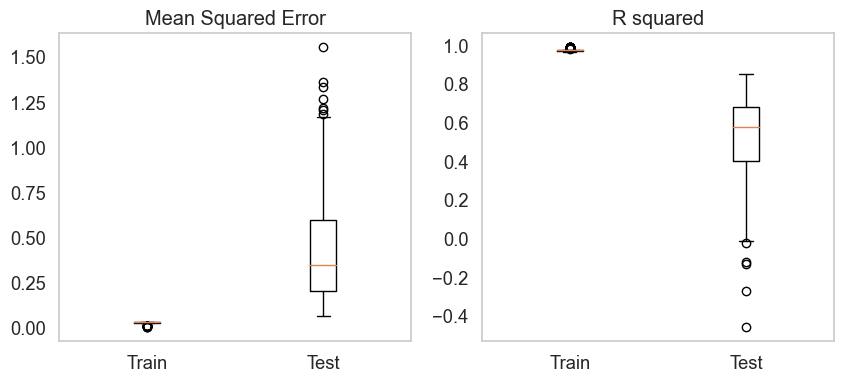

Train MSE standard deviation: 0.009339974286956555
Test MSE standard deviation:  0.3601879692814409

Train_R2 standard deviation: 0.0066674172854149895
Test_R2 standard deviation:  0.25838413479975364


In [58]:
import warnings;   warnings.filterwarnings("ignore") #Ignore warnings... Do not fix the problem
model = XGBRegressor(objective="reg:squarederror", n_estimators=10) #Change fit in functions
Created_Functions.Model_Performance(model,X,y)

<font color = 'green'>Feature importance

<AxesSubplot:>

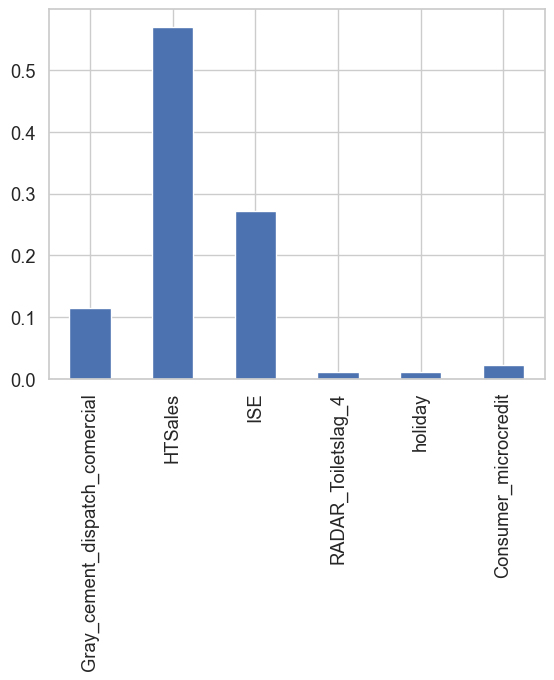

In [59]:
XGB = XGBRegressor(objective="reg:squarederror", n_estimators=10)
XGB.fit(X_train, y_train.ravel())
Features = corona_combined_var10.columns[1:11]

Feature_importances = pd.Series(XGB.feature_importances_, index=Features)
Feature_importances.plot.bar()

<font color = 'green'><b> Random Forest + standarded data

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 68.73it/s]


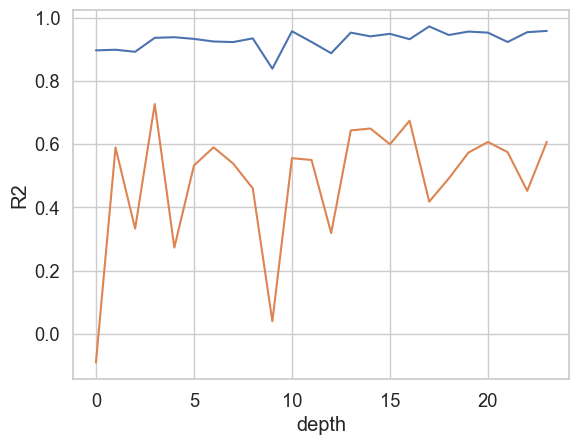

In [60]:
train_R2 =[]
test_R2=[]

for estimators in tqdm(range(1,25)):
    model = RandomForestRegressor(n_estimators=estimators)
    model.fit(standarded_x_train,y_train)
    y_pred_Train = model.predict(standarded_x_train) #Predictions
    y_pred_Test = model.predict(standarded_x_test) #Predictions
    
    train_R2.append(metrics.r2_score(y_train,y_pred_Train))
    test_R2.append(metrics.r2_score(y_test, y_pred_Test))

plt.plot(train_R2)
plt.plot(test_R2)

plt.ylabel('R2')
plt.xlabel('depth')
plt.show()

Test Metrics:
R squared: 0.7115510303224053
Mean Absolute Error: 0.5004072775384132
Mean Squared Error: 0.6813826548855525
Root Mean Squared Error: 0.825459057061919


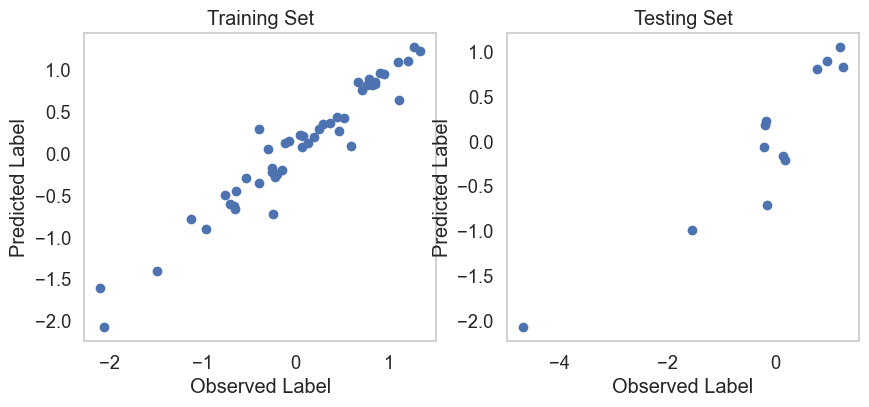

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 93.84it/s]


Train MSE median: 0.0759089703065291
Test MSE median: 0.3053712077456968

Train_R2 median: 0.9226812619203979
Test_R2 median: 0.5755638322493214


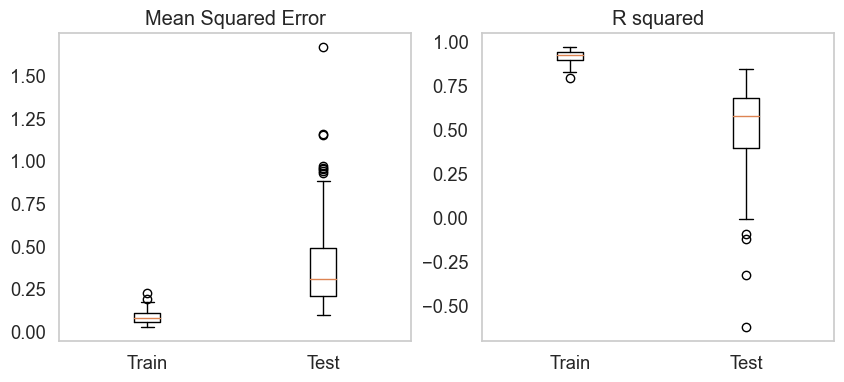

Train MSE standard deviation: 0.03800958794414993
Test MSE standard deviation:  0.28694671677586886

Train_R2 standard deviation: 0.035601597276366526
Test_R2 standard deviation:  0.2586016165878196


In [61]:
model = RandomForestRegressor(n_estimators=5) #Number of trees in the forest
Created_Functions.Model_Performance(model,X,y)

<AxesSubplot:>

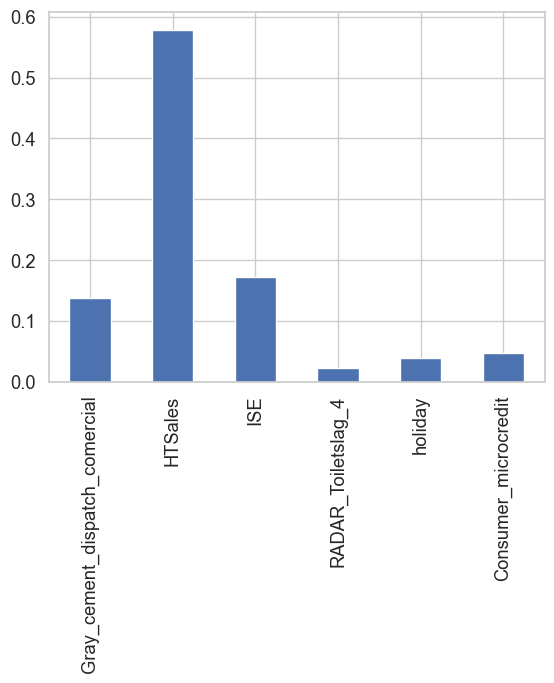

In [62]:
# feature importance

RegForest = RandomForestRegressor(n_estimators=5)
RegForest.fit(standarded_x_train,y_train)

Features = df.columns[1:11] #Getting the name of the features

Feature_importances = pd.Series(RegForest.feature_importances_, index=Features)
Feature_importances.plot.bar()

<font color = 'green'><b> Extra Trees + standarded data

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 93.36it/s]


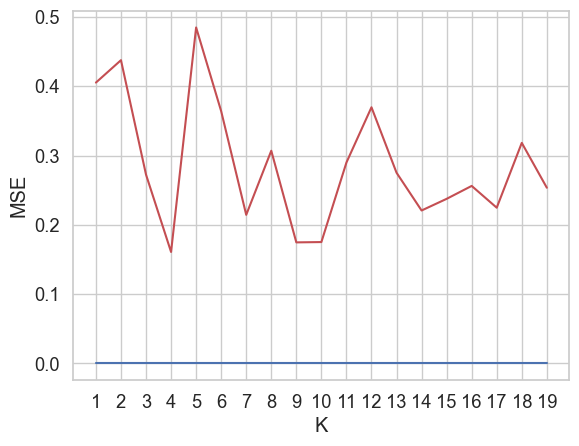

In [63]:
train_mse = []
pred_mse = []
K = list(range(1,20))

for k in tqdm(K):
    
    model = ExtraTreesRegressor(n_estimators=k) #Number of trees in the forest
    model.fit(standarded_x_train, y_train.ravel())

    y_pred_Train = model.predict(standarded_x_train) #Predictions
    y_pred_Test = model.predict(standarded_x_test) #Predictions
        
    train_mse.append(metrics.mean_squared_error(y_train, y_pred_Train))
    pred_mse.append(metrics.mean_squared_error(y_test, y_pred_Test))
       
plt.plot(K,train_mse,'b')
plt.plot(K,pred_mse,'r')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xticks(K)
plt.show()

Test Metrics:
R squared: 0.5016380916088894
Mean Absolute Error: 0.45624365429565056
Mean Squared Error: 0.42994301638379845
Root Mean Squared Error: 0.6557004013906035


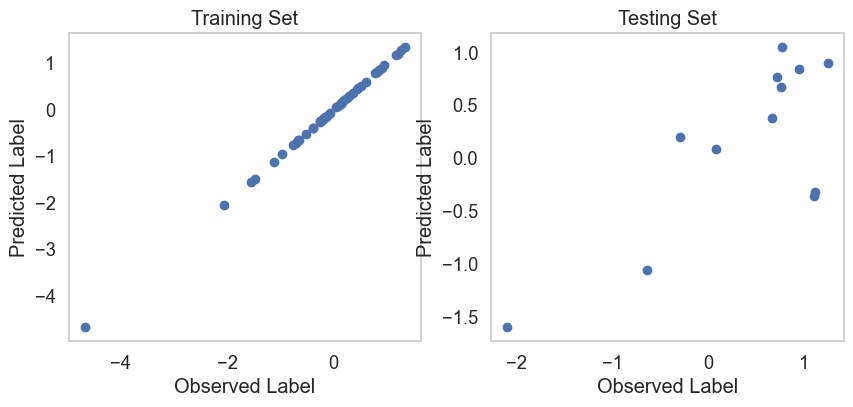

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 53.26it/s]

Train MSE median: 5.60656262404353e-32
Test MSE median: 0.24935371078492718

Train_R2 median: 1.0
Test_R2 median: 0.6164801150207416


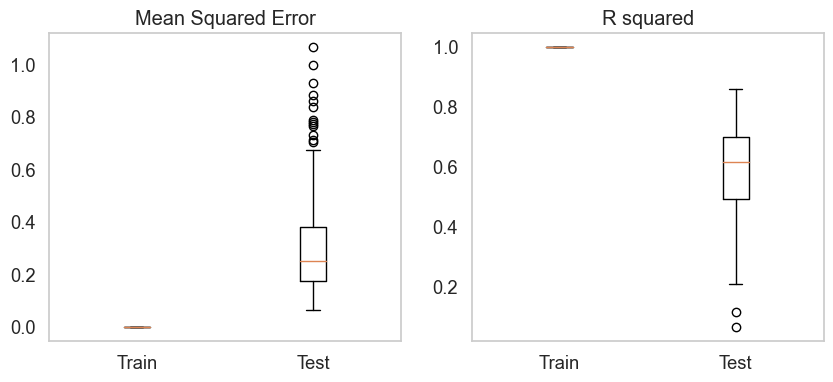

Train MSE standard deviation: 7.455546213623646e-33
Test MSE standard deviation:  0.23024702255546398

Train_R2 standard deviation: 0.0
Test_R2 standard deviation:  0.17071475189366905


In [64]:
model = ExtraTreesRegressor(n_estimators=20)
Created_Functions.Model_Performance(model,X,y)

<font color = 'green'>Feature importance

<AxesSubplot:>

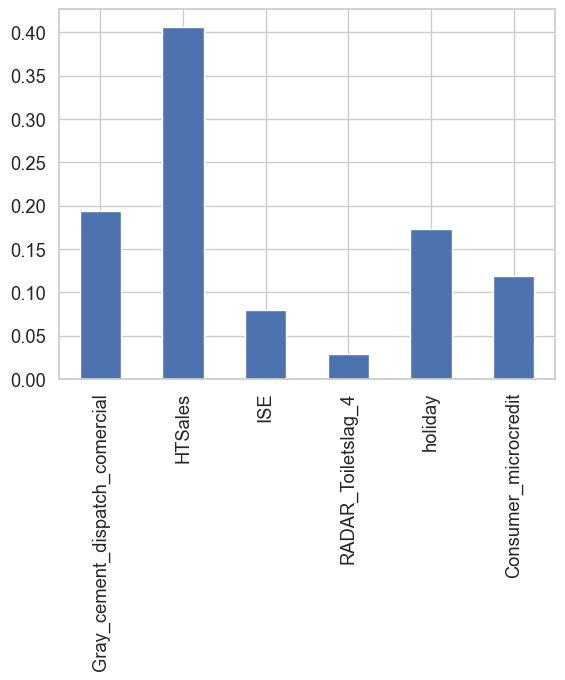

In [65]:
ExtraTree = ExtraTreesRegressor(n_estimators=20)
ExtraTree.fit(standarded_x_train,y_train)

Features = df.columns[1:11]

Feature_importances = pd.Series(ExtraTree.feature_importances_, index=Features)
Feature_importances.plot.bar()

<font color = 'green'><b> CATBoost + standarded data

100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:04<00:00, 13.07it/s]


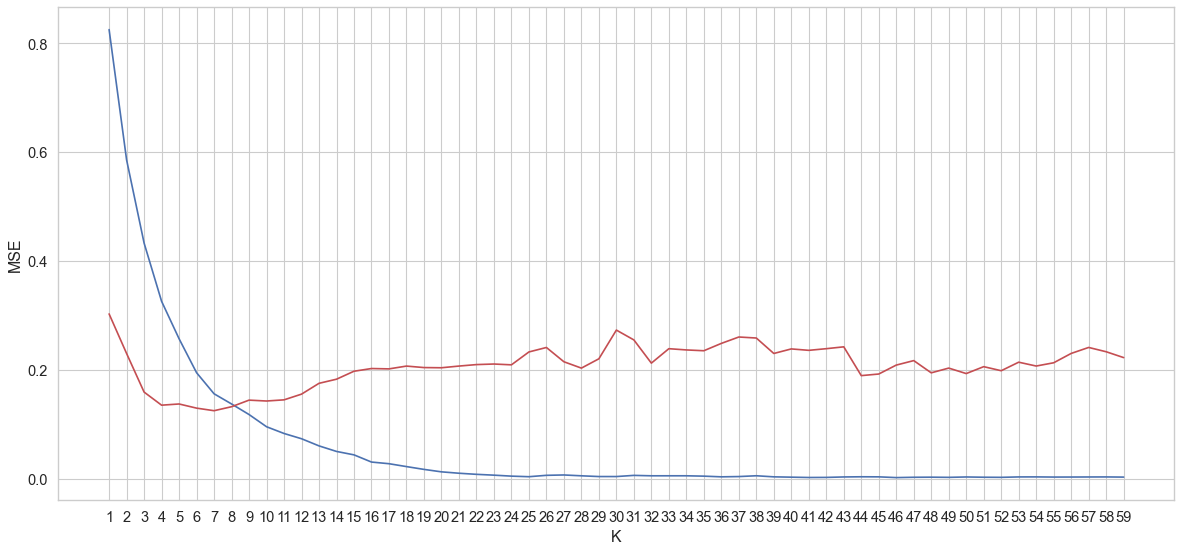

In [66]:
# model training curve
figure(figsize=(18, 8), dpi=80)

train_mse = []
pred_mse = []
K = list(range(1,60))

for k in tqdm(K):
    
    model = CatBoostRegressor(num_trees = k, verbose = 0) #Number of trees in the forest
    model.fit(standarded_x_train, y_train.ravel()) #ravel flattens the array

    y_pred_Train = model.predict(standarded_x_train) #Predictions
    y_pred_Test = model.predict(standarded_x_test) #Predictions
        
    train_mse.append(metrics.mean_squared_error(y_train, y_pred_Train))
    pred_mse.append(metrics.mean_squared_error(y_test, y_pred_Test))
       
plt.plot(K,train_mse,'b')
plt.plot(K,pred_mse,'r')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xticks(K)
plt.show()

Test Metrics:
R squared: 0.8153734782655747
Mean Absolute Error: 0.31405993063119514
Mean Squared Error: 0.14288586633485154
Root Mean Squared Error: 0.37800246868883214


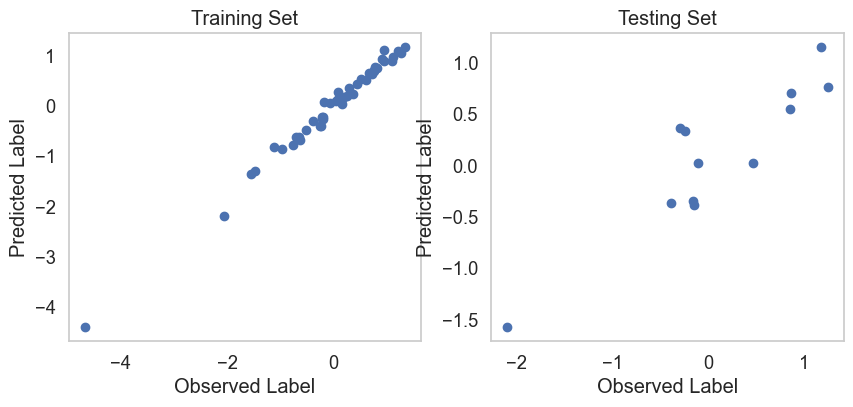

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.21it/s]


Train MSE median: 0.01707763557961017
Test MSE median: 0.29673536533612666

Train_R2 median: 0.9846419442866949
Test_R2 median: 0.5607726342994159


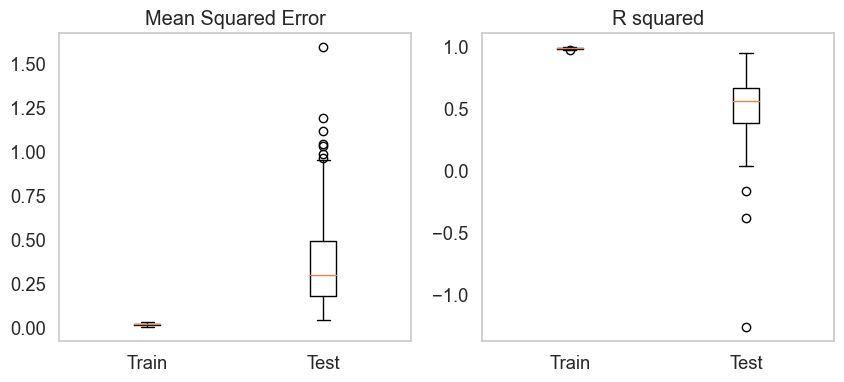

Train MSE standard deviation: 0.006693783642515353
Test MSE standard deviation:  0.32238040078204006

Train_R2 standard deviation: 0.005377926714515251
Test_R2 standard deviation:  0.293179094042983


In [67]:
# multiple run and Model Metrics
model = CatBoostRegressor(num_trees = 20, verbose = 0)
Created_Functions.Model_Performance(model,X,y)

<AxesSubplot:>

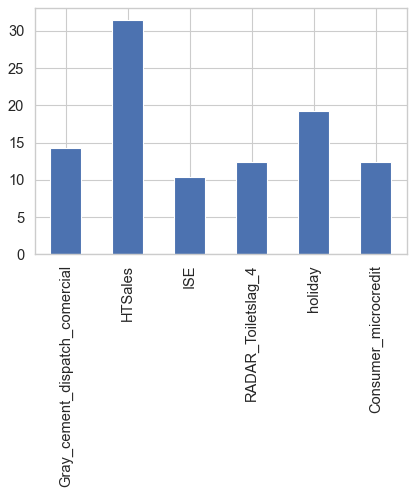

In [68]:
# feature importance
figure(figsize=(6, 4), dpi=80)

cb = CatBoostRegressor()
cb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)

Features = corona_combined_var10.columns[1:11]

Feature_importances = pd.Series(cb.feature_importances_, index=Features)
Feature_importances.plot.bar()

<font color = 'green'><b>LightBoost + standarded data

100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 194.93it/s]


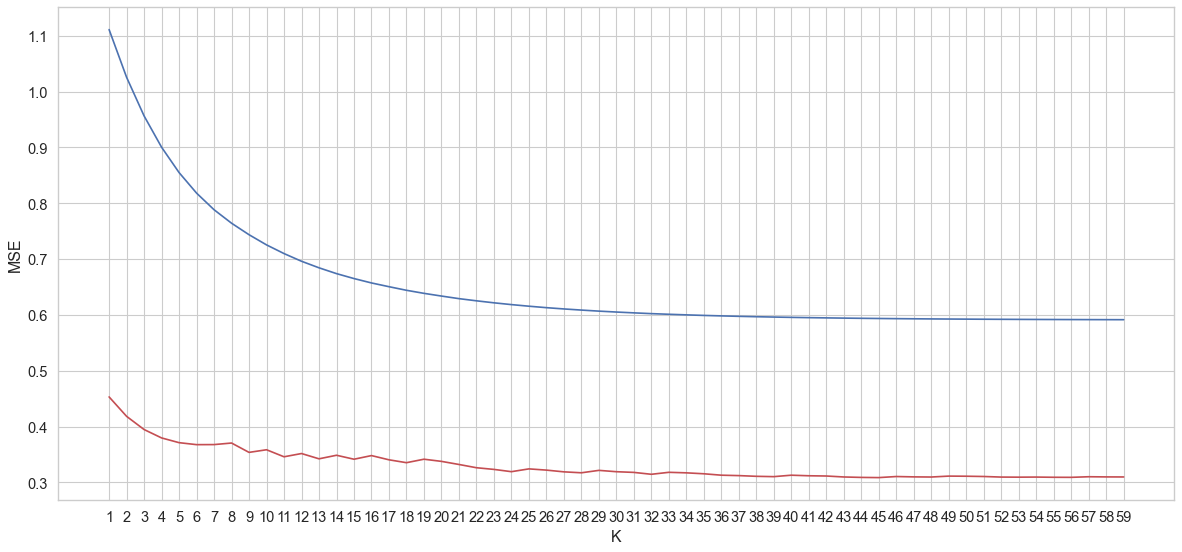

In [69]:
# model training curve
figure(figsize=(18, 8), dpi=80)

train_mse = []
pred_mse = []
K = list(range(1,60))

for k in tqdm(K):
    
    model = LGBMRegressor(n_estimators=k) #Number of trees in the forest
    model.fit(standarded_x_train, y_train.ravel()) #ravel flattens the array

    y_pred_Train = model.predict(standarded_x_train) #Predictions
    y_pred_Test = model.predict(standarded_x_test) #Predictions
        
    train_mse.append(metrics.mean_squared_error(y_train, y_pred_Train))
    pred_mse.append(metrics.mean_squared_error(y_test, y_pred_Test))
       
plt.plot(K,train_mse,'b')
plt.plot(K,pred_mse,'r')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xticks(K)
plt.show()

Test Metrics:
R squared: 0.5564704619169623
Mean Absolute Error: 0.41852358718681626
Mean Squared Error: 0.24068440160947668
Root Mean Squared Error: 0.4905959657492881


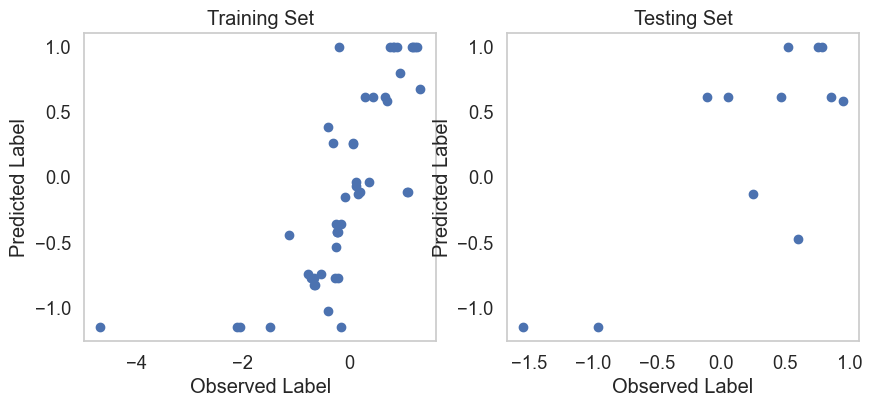

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 86.24it/s]


Train MSE median: 0.48691282925445334
Test MSE median: 0.415229108532275

Train_R2 median: 0.5442949921913309
Test_R2 median: 0.40347254761818346


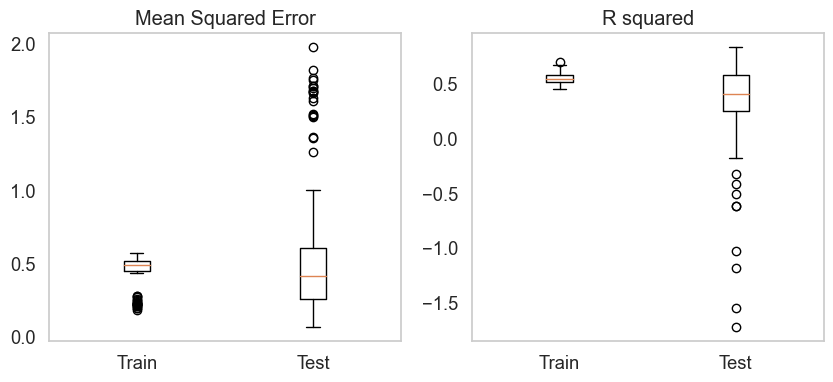

Train MSE standard deviation: 0.11410484416444341
Test MSE standard deviation:  0.5286707248434935

Train_R2 standard deviation: 0.05348623261079033
Test_R2 standard deviation:  0.456205990776602


In [70]:
# multiple run and Model Metrics
model = LGBMRegressor(n_estimators=60)
Created_Functions.Model_Performance(model,X,y)

<AxesSubplot:>

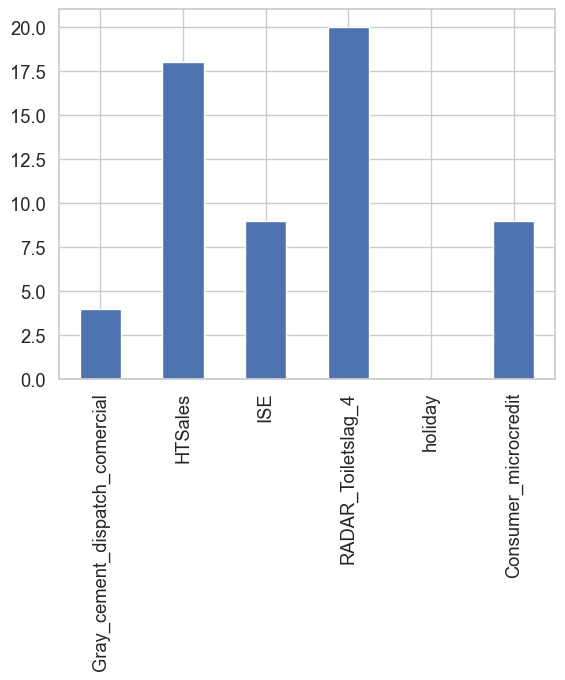

In [71]:
# feature importance
lgbm = LGBMRegressor(n_estimators=60)
lgbm.fit(X_train, y_train)

Features = corona_combined_var10.columns[1:11]

Feature_importances = pd.Series(lgbm.feature_importances_, index=Features)
Feature_importances.plot.bar()

# 5. Multiple Models Running (by default parameters)

In [72]:
## LinearRegression(), Ridge(), Lasso(), ElasticNet()

In [73]:
# original data + LinearRegression
Created_Functions.Model_Multiple(LinearRegression(), corona_combined_var10, 0.3)
#Created_Functions.Model_Multiple(LinearRegression(), X_train, X_test, y_train, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 275.28it/s]

Train MSE median: 0.15133414059311712
Test MSE median: 0.20550377951472842

Train_R2 median: 0.8576486318694625
Test_R2 median: 0.7363587982147282

Train MSE standard deviation: 0.025684238800733745
Test MSE standard deviation:  0.07801474204249212

Train_R2 standard deviation: 0.05743785283698834
Test_R2 standard deviation:  0.16097373093618705


In [74]:
# original data + RidgeRegression
Created_Functions.Model_Multiple(Ridge(), corona_combined_var10, 0.3)
#Created_Functions.Model_Multiple(Ridge(), X_train, X_test, y_train, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.65it/s]

Train MSE median: 0.14771943088502834
Test MSE median: 0.2082055366611675

Train_R2 median: 0.8608210236115711
Test_R2 median: 0.7224934489730657

Train MSE standard deviation: 0.024458362557688785
Test MSE standard deviation:  0.07831330722563828

Train_R2 standard deviation: 0.05602488144987241
Test_R2 standard deviation:  0.16156640722946833


In [75]:
# # original data + LassoRegression
# Created_Functions.Model_Multiple(Lasso(), corona_combined_var10, 0.3)
# #Created_Functions.Model_Multiple(Lasso(), X_train, X_test, y_train, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.94it/s]

Train MSE median: 0.24018975841652015
Test MSE median: 0.33268433583330115

Train_R2 median: 0.7596810950362338
Test_R2 median: 0.6026445635493622

Train MSE standard deviation: 0.04402573596265911
Test MSE standard deviation:  0.18974397865287929

Train_R2 standard deviation: 0.05687209418027773
Test_R2 standard deviation:  0.2423121183952761


In [76]:
# # original data + ElasticNetRegression
# Created_Functions.Model_Multiple(ElasticNet(), corona_combined_var10, 0.3)
# #Created_Functions.Model_Multiple(ElasticNet(), X_train, X_test, y_train, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.19it/s]

Train MSE median: 0.19794676331865813
Test MSE median: 0.29998312844263963

Train_R2 median: 0.8157589354883947
Test_R2 median: 0.6360357571431275

Train MSE standard deviation: 0.026709884412442795
Test MSE standard deviation:  0.1899154176790363

Train_R2 standard deviation: 0.06959052013749394
Test_R2 standard deviation:  0.22136625694990758


### normalization

In [77]:
# normalized data + LinearRegression
Created_Functions.Model_Multiple_Normalized(LinearRegression(), corona_combined_var10, 0.3)
#Created_Functions.Model_Multiple(LinearRegression(), normalized_x_train, normalized_x_test, y_train, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.40it/s]

Train MSE median: 0.14842746406589996
Test MSE median: 0.21340722744146567

Train_R2 median: 0.8605806233381372
Test_R2 median: 0.7252918867164754

Train MSE standard deviation: 0.024687957427873383
Test MSE standard deviation:  0.07831193722587756

Train_R2 standard deviation: 0.0559141039464356
Test_R2 standard deviation:  0.169132218087692


In [78]:
# normalized data + RidgeRegression
Created_Functions.Model_Multiple_Normalized(Ridge(), corona_combined_var10, 0.3)
#Created_Functions.Model_Multiple(Ridge(), normalized_x_train, normalized_x_test, y_train, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 202.25it/s]

Train MSE median: 0.1983261446931086
Test MSE median: 0.21677859294272234

Train_R2 median: 0.8065625780755605
Test_R2 median: 0.7302383908710524

Train MSE standard deviation: 0.03203504944430766
Test MSE standard deviation:  0.09324472034395093

Train_R2 standard deviation: 0.058071755050488914
Test_R2 standard deviation:  0.17637831886400204


In [79]:
# # normalized data + LassoRegression
# Created_Functions.Model_Multiple_Normalized(Lasso(), corona_combined_var10, 0.3)

In [80]:
# # normalized data + ElasticNetRegression
# Created_Functions.Model_Multiple_Normalized(ElasticNet(), corona_combined_var10, 0.3)

### standardization

In [81]:
# Standarded data + LinearRegression
Created_Functions.Model_Multiple_Standarded(LinearRegression(), corona_combined_var10, 0.3)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.33it/s]

Train MSE median: 0.14911605032051903
Test MSE median: 0.2097698297296004

Train_R2 median: 0.8584129949617016
Test_R2 median: 0.7321309337158408

Train MSE standard deviation: 0.025398444621332655
Test MSE standard deviation:  0.07894448529351679

Train_R2 standard deviation: 0.05837795815150654
Test_R2 standard deviation:  0.16484171431623543


In [82]:
# Standarded data + RidgeRegression
Created_Functions.Model_Multiple_Standarded(Ridge(), corona_combined_var10, 0.3)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 196.61it/s]

Train MSE median: 0.14855843722327527
Test MSE median: 0.20718862645782088

Train_R2 median: 0.8611705110134357
Test_R2 median: 0.7278132050620167

Train MSE standard deviation: 0.025851245524640555
Test MSE standard deviation:  0.08079532009830669

Train_R2 standard deviation: 0.058175255347134594
Test_R2 standard deviation:  0.1708342713218505


In [83]:
# # Standarded data + LassoRegression
# Created_Functions.Model_Multiple_Standarded(Lasso(), corona_combined_var10, 0.3)

In [84]:
# # Standarded data + ElasticNetRegression
# Created_Functions.Model_Multiple_Standarded(ElasticNet(), corona_combined_var10, 0.3)

### centered data

In [85]:
# Centered data + LinearRegression
Created_Functions.Model_Multiple_Centered(LinearRegression(), corona_combined_var10, 0.3)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 212.62it/s]

Train MSE median: 0.14964889649362914
Test MSE median: 0.2078075070822299

Train_R2 median: 0.8596421484853409
Test_R2 median: 0.7215265484466566

Train MSE standard deviation: 0.02506511810131935
Test MSE standard deviation:  0.08125765286512328

Train_R2 standard deviation: 0.05758480311716155
Test_R2 standard deviation:  0.16477746731453774


In [86]:
# Centered data + RidgeRegression
Created_Functions.Model_Multiple_Centered(Ridge(), corona_combined_var10, 0.3)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 236.62it/s]

Train MSE median: 0.1490921817596511
Test MSE median: 0.21188981762901077

Train_R2 median: 0.8585583361257775
Test_R2 median: 0.7365016350859499

Train MSE standard deviation: 0.024592699430342313
Test MSE standard deviation:  0.0773888382321019

Train_R2 standard deviation: 0.06061443418260669
Test_R2 standard deviation:  0.16928776883389976


In [87]:
# # Centered data + LassoRegression
# Created_Functions.Model_Multiple_Centered(Lasso(), corona_combined_var10, 0.3)

In [88]:
# # Centered data + ElasticNetRegression
# Created_Functions.Model_Multiple_Centered(ElasticNet(), corona_combined_var10, 0.3)

In [89]:
TOP_6 = list(corona_combined_var10.columns)
TOP_6

['Quantity',
 'Gray_cement_dispatch_comercial',
 'HTSales',
 'ISE',
 'RADAR_Toiletslag_4',
 'holiday',
 'Consumer_microcredit']

# 6. Predict- Actual Line chart

In [103]:
# Standarded data + RidgeRegression
#Created_Functions.Model_Multiple_Standarded(Ridge(), corona_combined_var10, 0.3)

df = corona_combined_var10.copy() # deep copy a new one

X = df.drop(['Quantity'], axis=1)
y = df['Quantity']
            
model = Ridge()
model.fit(Created_Functions.standardization(X), y) #Train the model

df['Prediction'] = model.predict(Created_Functions.standardization(X))


import plotly.graph_objs as go

traces = [go.Scatter(
        x = df.index,
        y = df[colname],
        mode = 'markers+lines',
        name = colname            
        ) for colname in list(['Quantity', 'Prediction'])]

layout = go.Layout(title='Prediction vs Actual<br><sup>Standarded data + RidgeRegression</sup>')
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [102]:
# Standarded data + LinearRegression
#Created_Functions.Model_Multiple_Standarded(Ridge(), corona_combined_var10, 0.3)

df = corona_combined_var10.copy() # deep copy a new one

X = df.drop(['Quantity'], axis=1)
y = df['Quantity']
            
model = LinearRegression()
model.fit(Created_Functions.standardization(X), y) #Train the model

df['Prediction'] = model.predict(Created_Functions.standardization(X))


import plotly.graph_objs as go

traces = [go.Scatter(
        x = df.index,
        y = df[colname],
        mode = 'markers+lines',
        name = colname            
        ) for colname in list(['Quantity', 'Prediction'])]

layout = go.Layout(title='Prediction vs Actual<br><sup>Standarded data + LinearRegression</sup>')
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [101]:
# Normalized data + LinearRegression
#Created_Functions.Model_Multiple_Standarded(Ridge(), corona_combined_var10, 0.3)

df = corona_combined_var10.copy() # deep copy a new one

X = df.drop(['Quantity'], axis=1)
y = df['Quantity']
            
model = LinearRegression()
model.fit(Created_Functions.nomalization(X), y) #Train the model

df['Prediction'] = model.predict(Created_Functions.nomalization(X))


import plotly.graph_objs as go

traces = [go.Scatter(
        x = df.index,
        y = df[colname],
        mode = 'markers+lines',
        name = colname            
        ) for colname in list(['Quantity', 'Prediction'])]

layout = go.Layout(title='Prediction vs Actual<br><sup>Normalized data + LinearRegression</sup>')
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [100]:
# Normalized data + RidgeRegression
#Created_Functions.Model_Multiple_Standarded(Ridge(), corona_combined_var10, 0.3)

df = corona_combined_var10.copy() # deep copy a new one

X = df.drop(['Quantity'], axis=1)
y = df['Quantity']
            
model = Ridge()
model.fit(Created_Functions.nomalization(X), y) #Train the model

df['Prediction'] = model.predict(Created_Functions.nomalization(X))


import plotly.graph_objs as go

traces = [go.Scatter(
        x = df.index,
        y = df[colname],
        mode = 'markers+lines',
        name = colname            
        ) for colname in list(['Quantity', 'Prediction'])]

layout = go.Layout(title='Prediction vs Actual<br><sup>Normalized data + RidgeRegression</sup>')
fig = go.Figure(data=traces, layout=layout)
fig.show()